<a href="https://colab.research.google.com/github/naiyajpatel/Trade-and-Ahead/blob/main/USL_Project_LearnerNotebook_FullCode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [62]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [64]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
!pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")



In [4]:
# importing drive and mounting it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# creating path for colab to access dataset
path = '/content/drive/MyDrive/stock_data.csv'
data = pd.read_csv(path)

In [6]:
# checking first five rows of data set
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [7]:
# checking last five rows of data set
data.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

## Data Overview

- Observations
- Sanity checks

In [8]:
# Checking total number of rows and columns
data.shape

(340, 15)

In [9]:
# checking info of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [10]:
# Checking description of data set
data.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                ZTS    1   
Security                                                  Zoetis    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

In [11]:
# checking data types of all variables
data.dtypes

Ticker Symbol                    object
Security                         object
GICS Sector                      object
GICS Sub Industry                object
Current Price                   float64
Price Change                    float64
Volatility                      float64
ROE                               int64
Cash Ratio                        int64
Net Cash Flow                     int64
Net Income                        int64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
P/E Ratio                       float64
P/B Ratio                       float64
dtype: object

In [12]:
# Checking for null values
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [13]:
# Checking for duplicated values
data.duplicated().sum()

np.int64(0)

In [14]:
# Checking unique values
data.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

In [15]:
# copying dataframe
df = data.copy()

Observations:

1. There are total 340 rows and 15 columns in the dataset
2. There are no null values or duplicates present in the dataset
3. The variables consists of 4 object data types, 4 integer data types and 7 float data types

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**Univariate Analysis:**

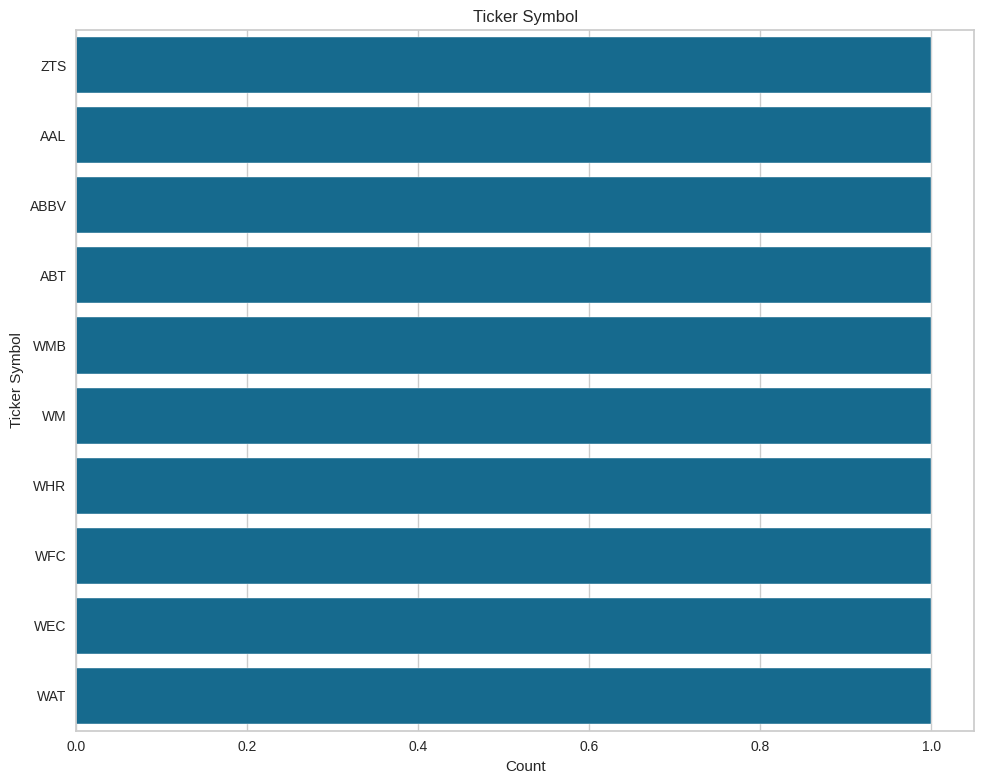

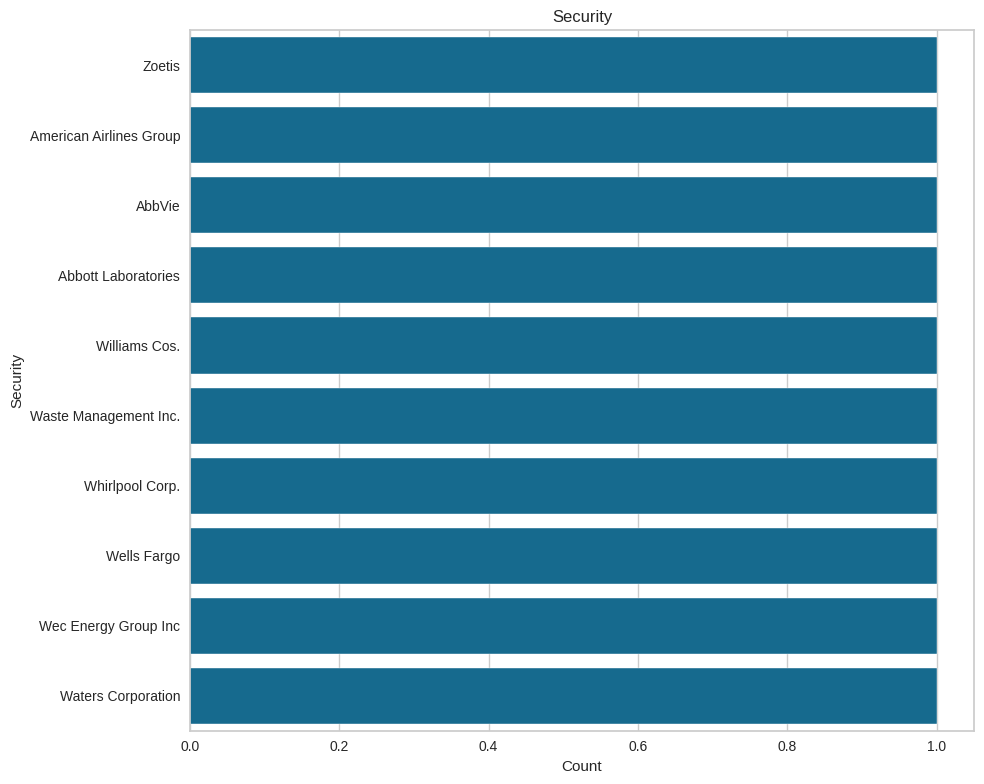

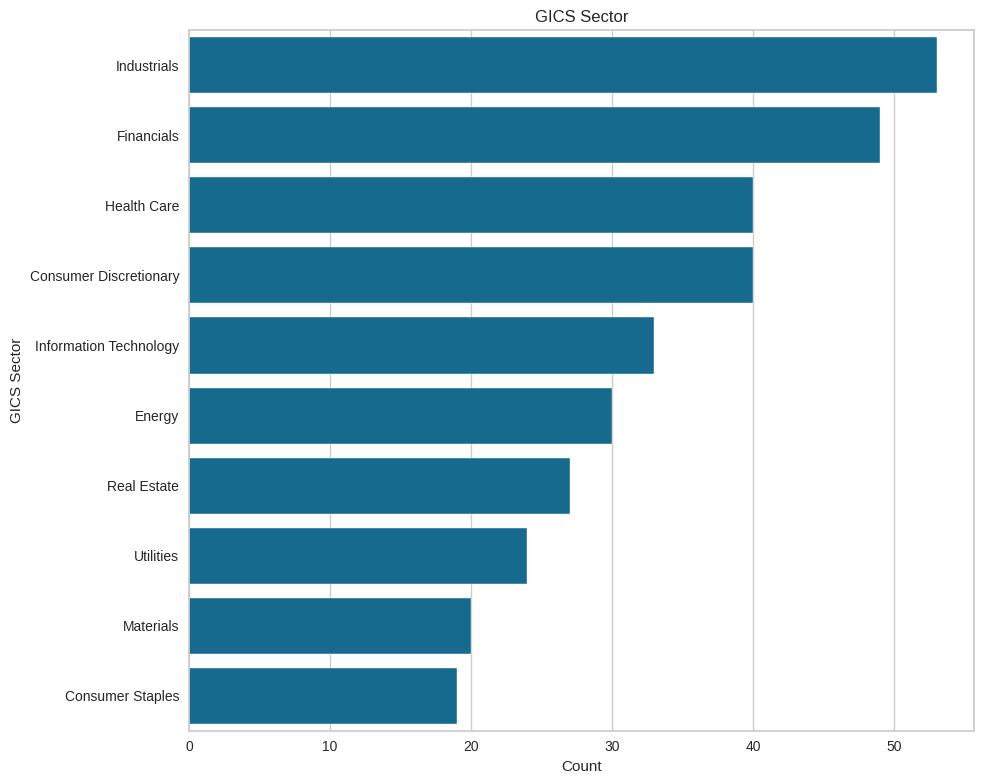

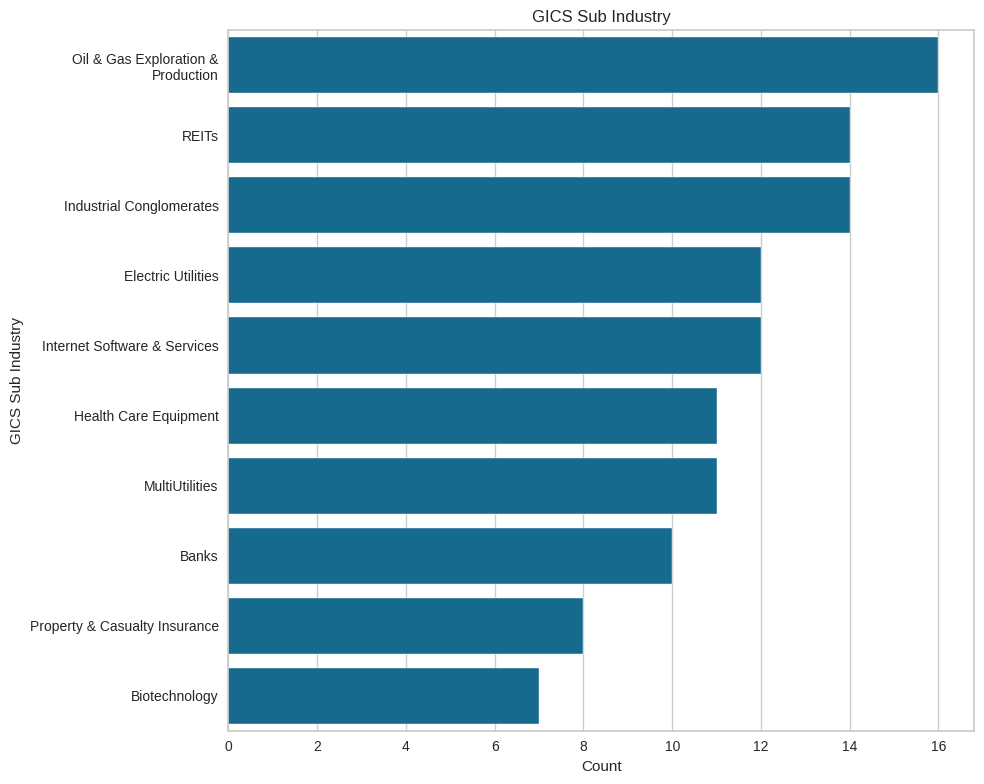

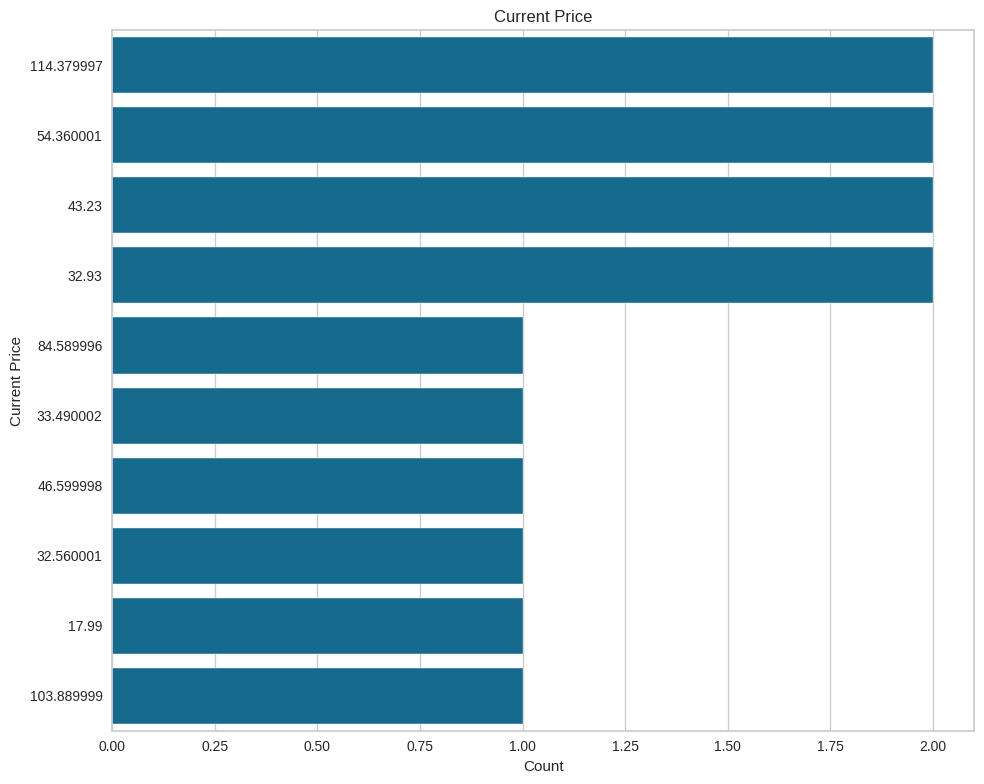

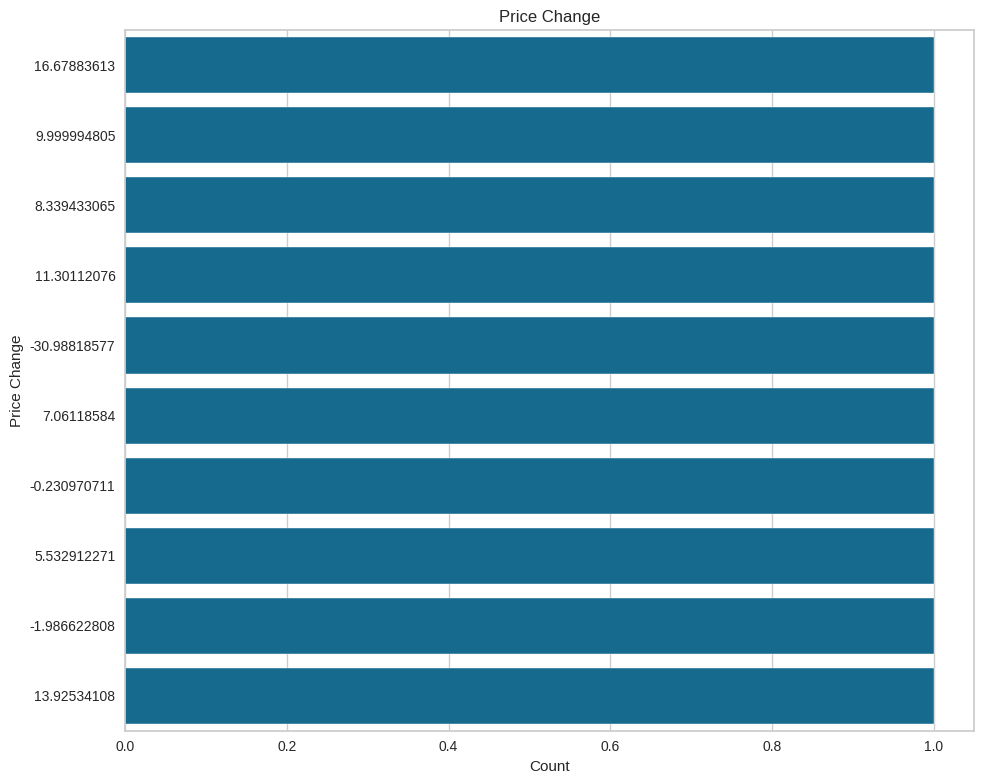

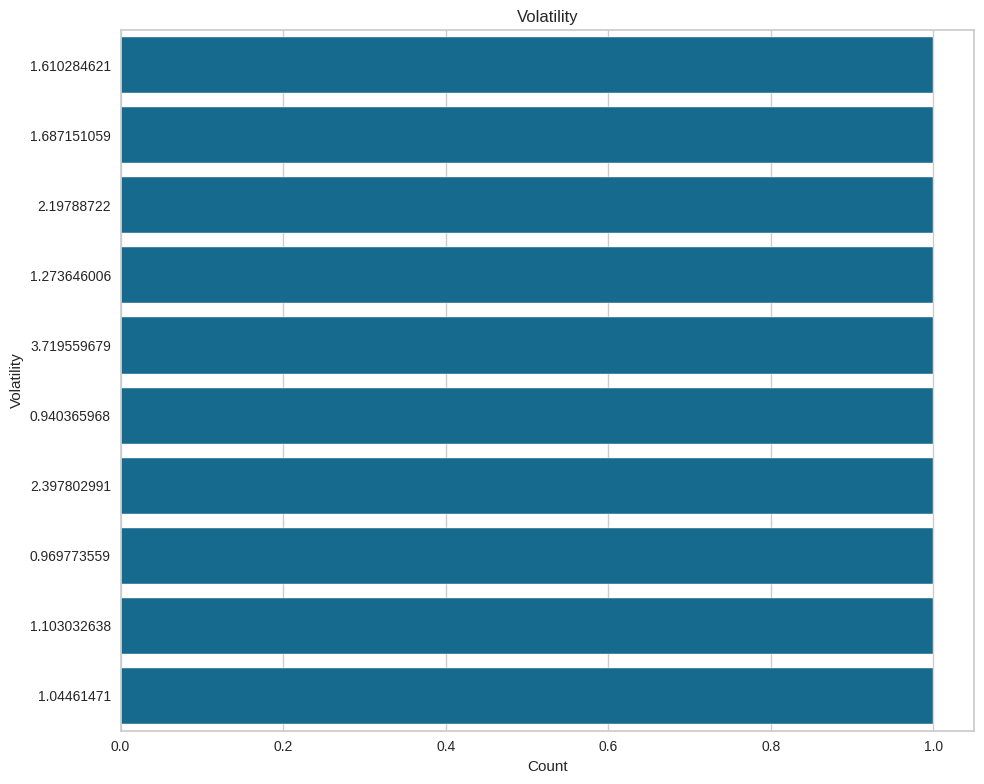

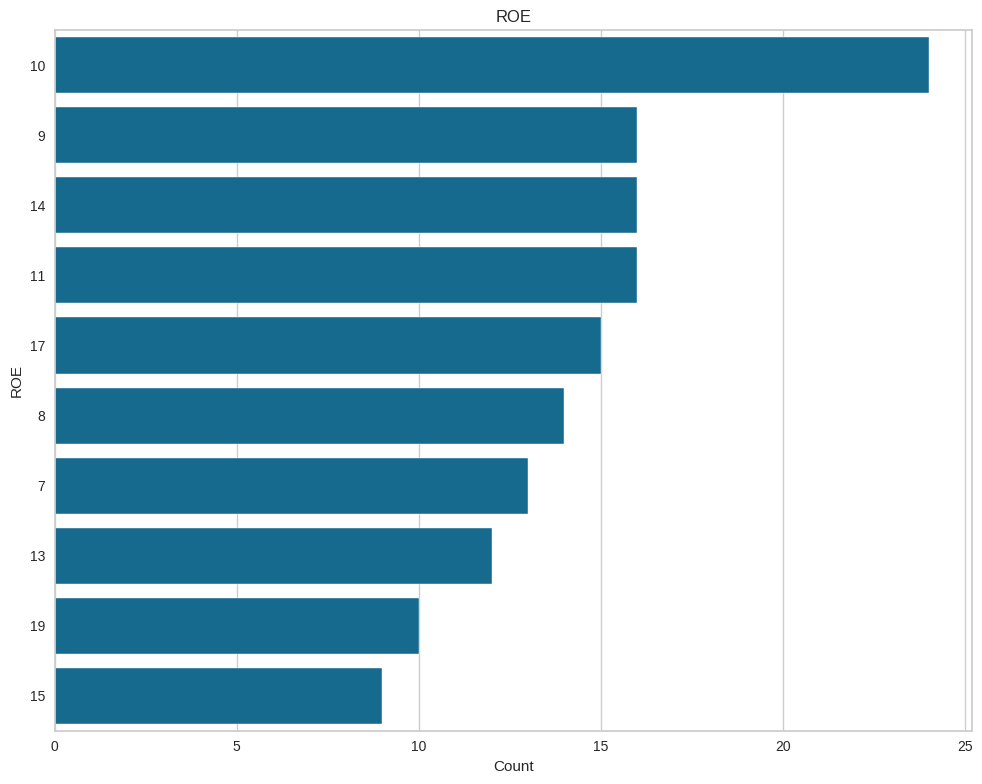

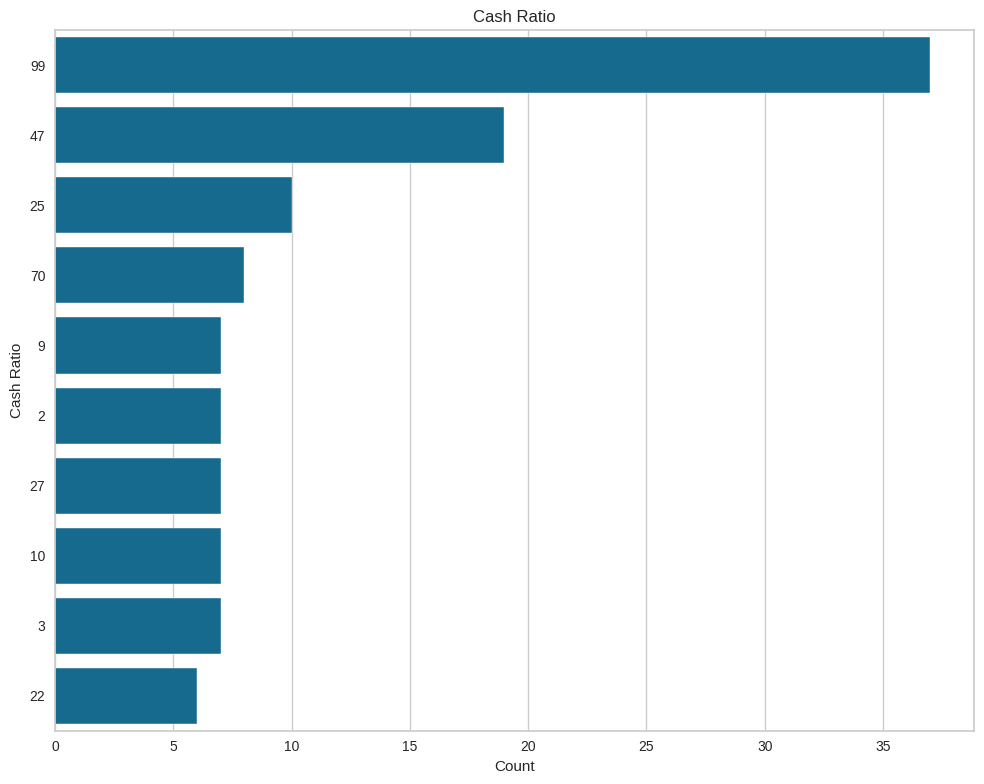

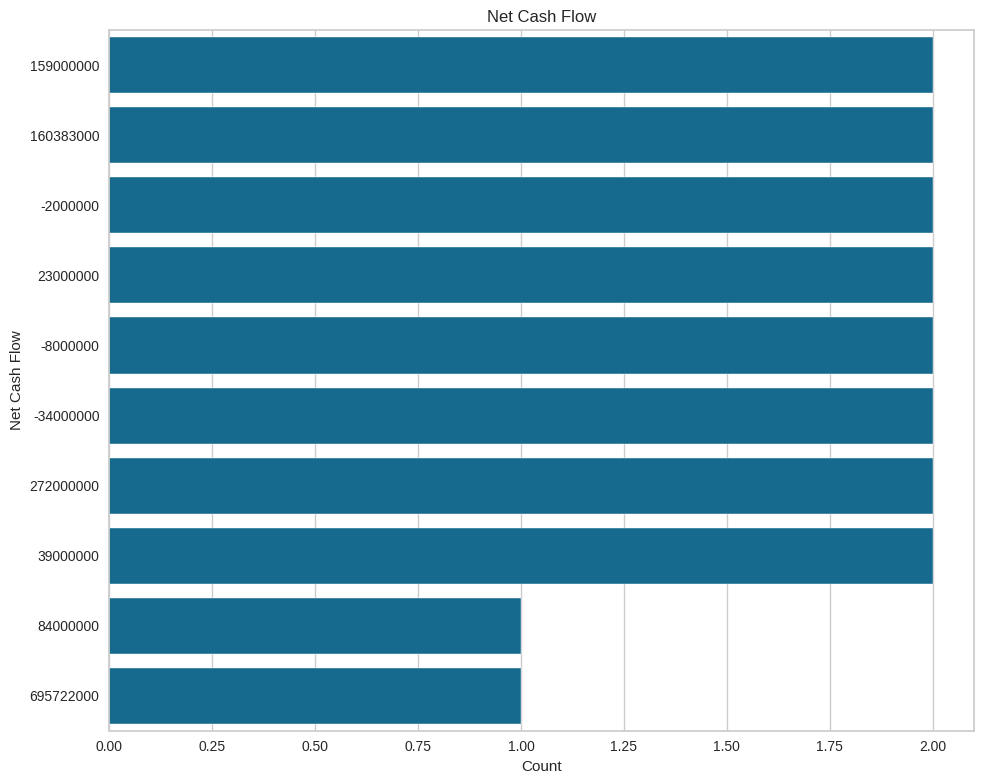

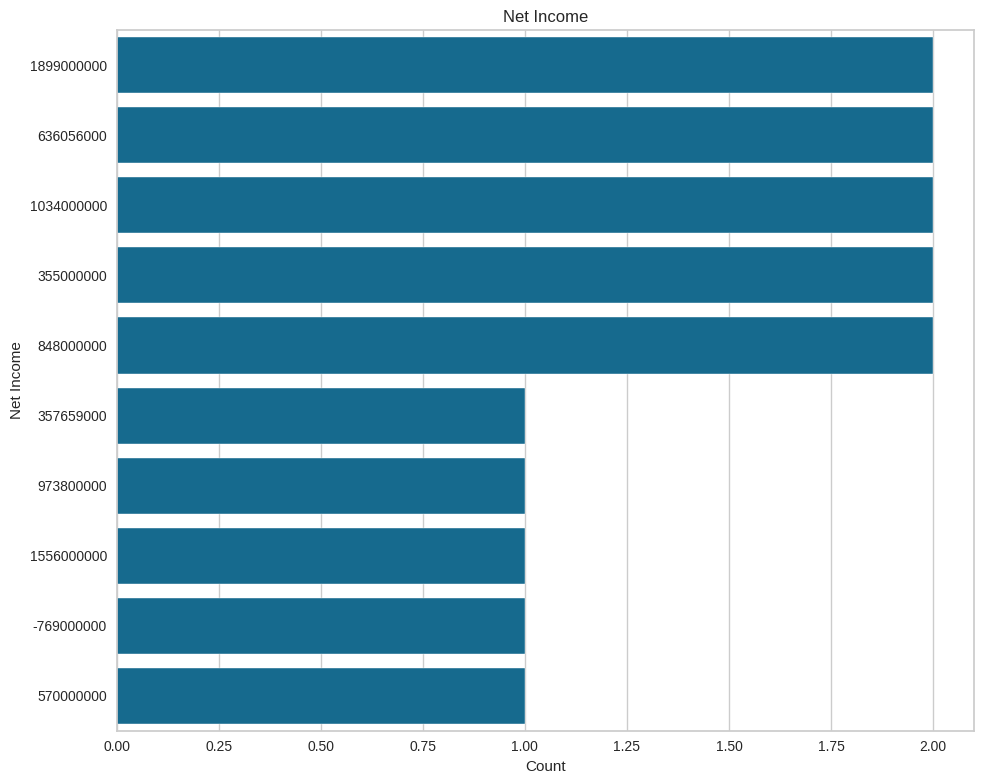

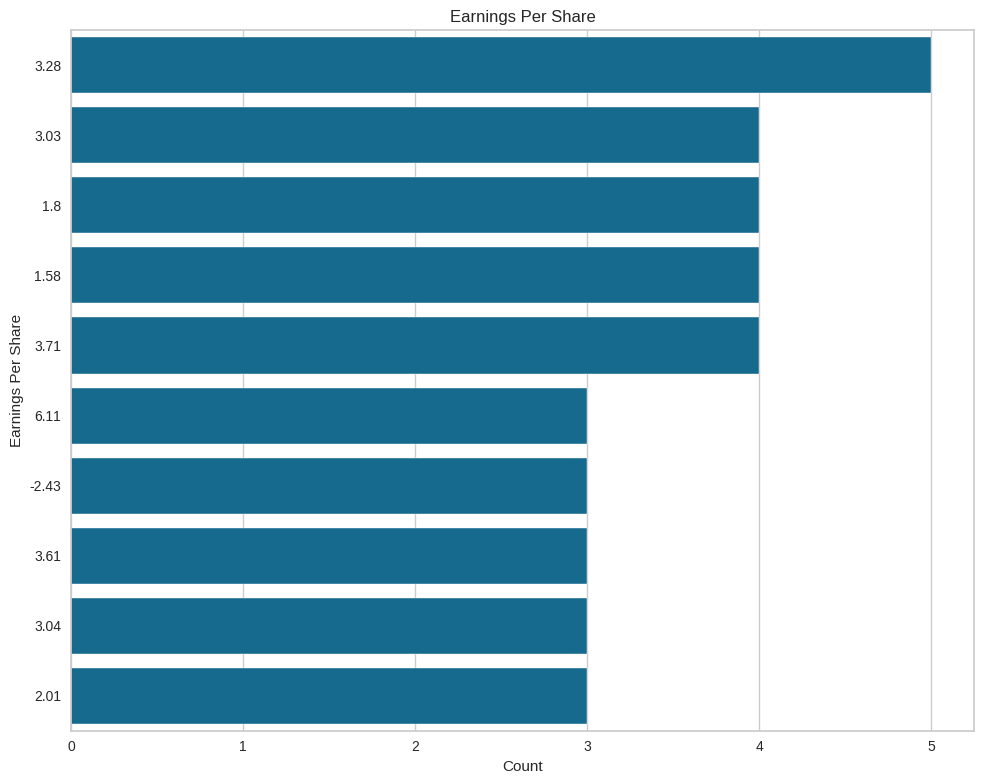

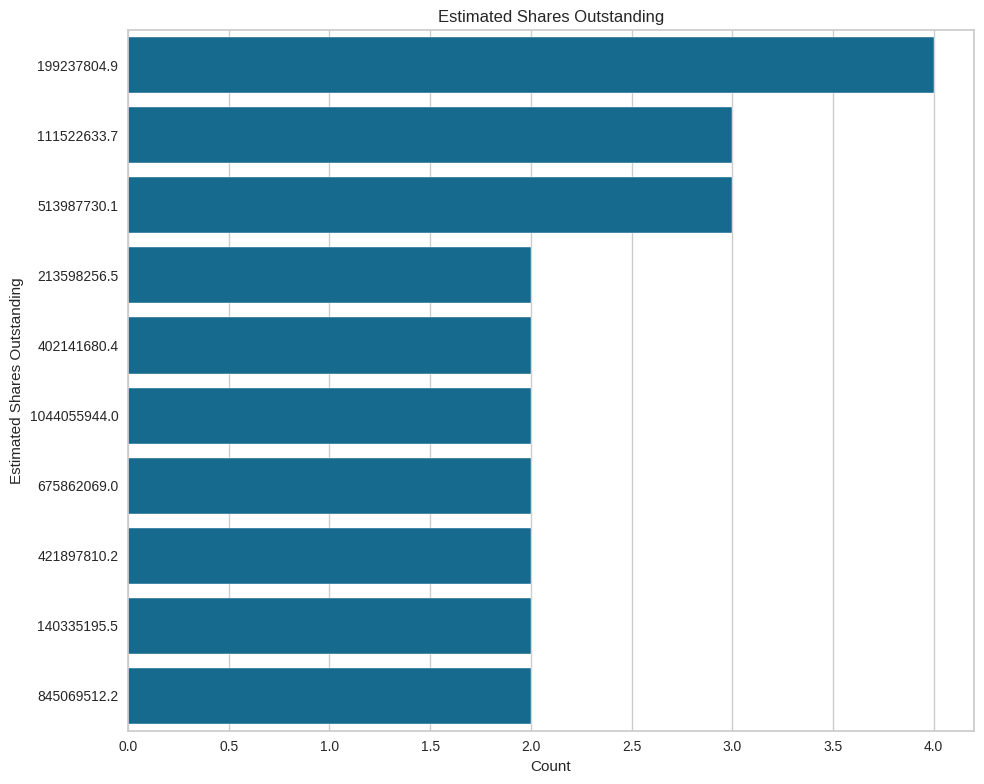

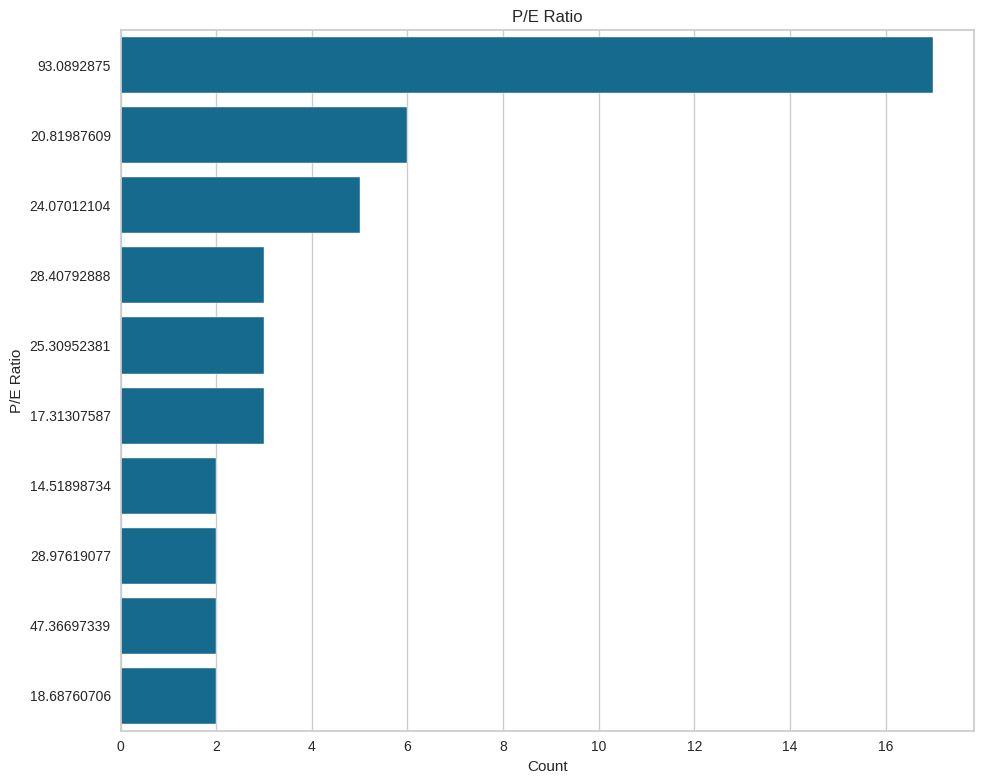

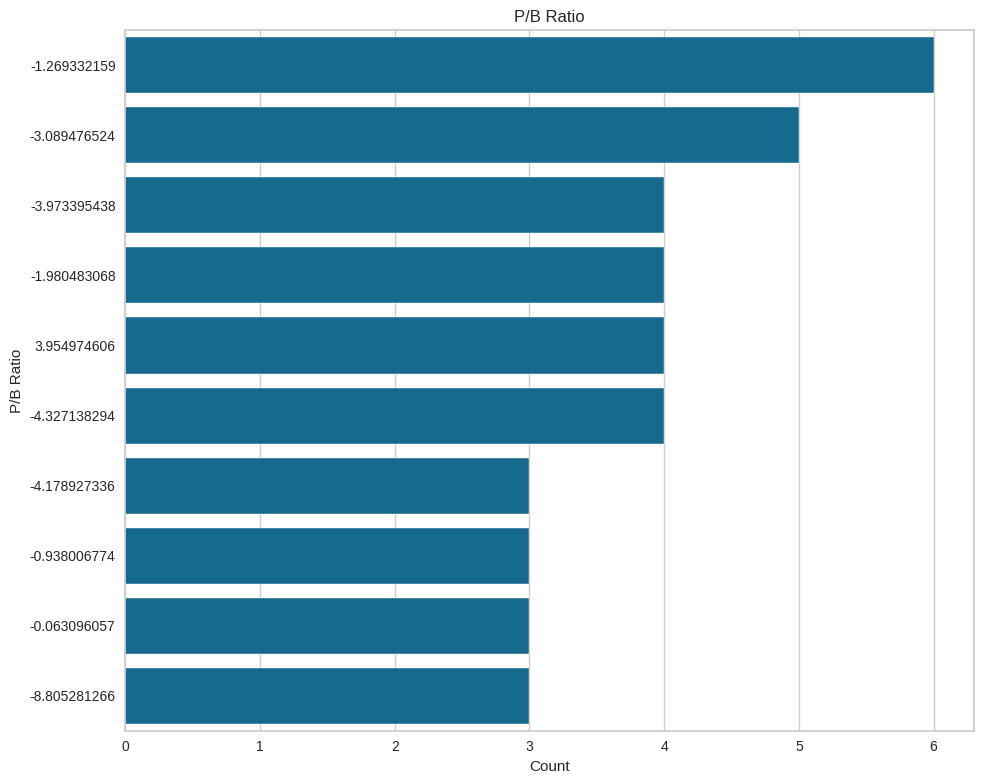

In [16]:
# plotting barplot for each columns in data
col = ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

import textwrap

for i, variable in enumerate(col):
    plt.figure(figsize=(10, 8))
    value_counts = data[variable].value_counts().nlargest(10)
    labels = [textwrap.fill(str(label), 30) for label in value_counts.index]  # wrap text to 30 chars

    sns.barplot(y=labels, x=value_counts.values)
    plt.title(variable)
    plt.xlabel("Count")
    plt.ylabel(variable)
    plt.tight_layout()
    plt.show()

1. **How does the distribution of stock prices look like?**

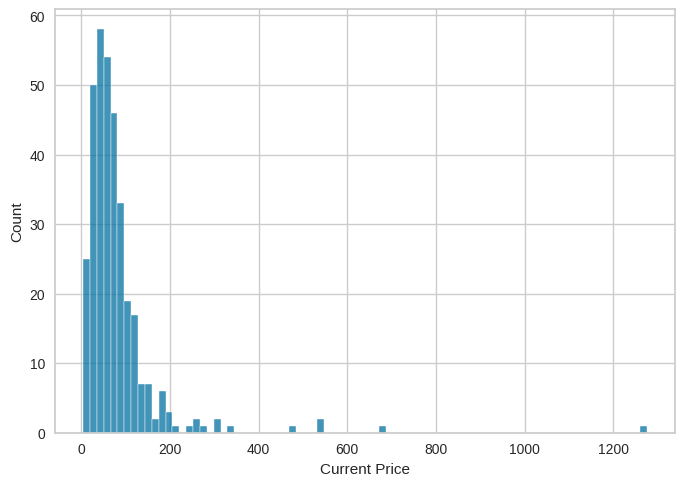

In [17]:
# Plotting histplot for current price
sns.histplot(x='Current Price', data=df);

**Observation: The distribution of stock prices looks like right skewed distribution**

**Overall Observation of Univariate Analysis:**

1. The following variables: GICS Sector, GICS Sub Industry, Current Price, ROE, Cash Ratio, Net Cash Flow, Net Income, Earnings per Share, Estimated Shares Outstanding, P/E Ratio, and P/B Ratio shows right skewed distribution.

2. Variables other than above listed variables shows no pattern in distribution, it was equally distributed.

**Bivariate Analysis: **

**2. The Stocks of which economic sector have seen the maximum price increase on average?**

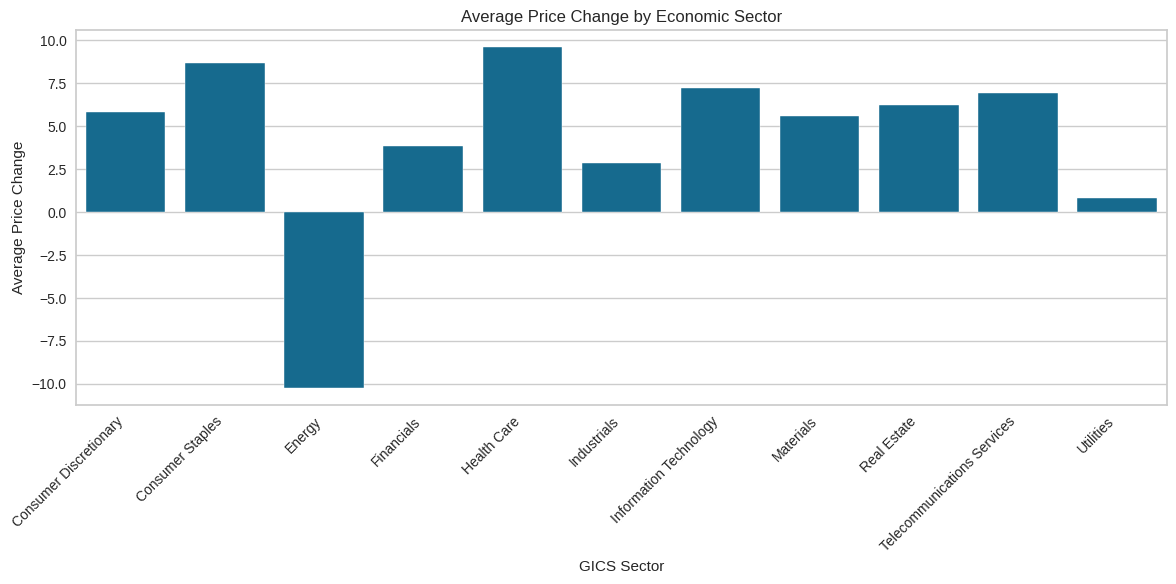

In [18]:
# Group by 'GICS Sector' and calculate average 'Price Change'
avg_price_change_by_sector = data.groupby('GICS Sector')['Price Change'].mean() # Assign the result to a variable

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_change_by_sector.index, y=avg_price_change_by_sector.values) # Use the variable here
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price Change')
plt.title('Average Price Change by Economic Sector')
plt.tight_layout()
plt.show()

Observation: The sector with the highest average price increase is 'Health Care' with an average increase of 9.59.

**3. How are different variables correlated with each other?**

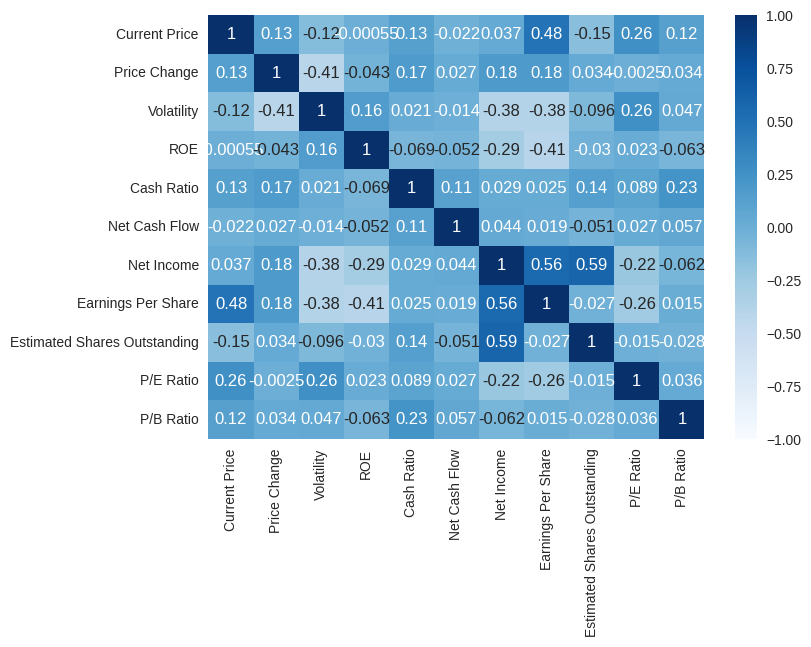

In [19]:
# assigning numeric columns for heatmap
numeric_cols =['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']
sns.heatmap(df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

Observation:

1. Net Income is directly proportional to Earnings per Share and Estimated Share Outstanding. As Net income of the company increases, its earning per share increases which means every shareholders benefits from it as well as Estimated Share Outstanding also increases

2. As Net income increases P/E Ratio, P/B Ratio and Volatility decreases.

3. Current Price is slightly proportional to Earnings per share which means increase in current price increases earnings per share

4. Price Change is negatively proportional to volatility

5. ROE is negatively proportional to Earnings per Share

**4. Cash Ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

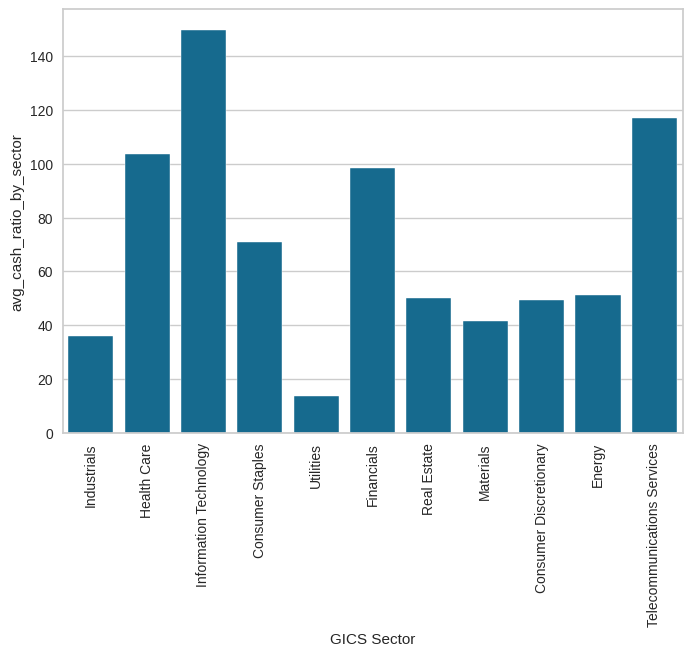

In [20]:
# creating new variable in data frame for averaging cash ratio
avg_cash_ratio_by_sector = data.groupby('GICS Sector')['Cash Ratio'].mean()

# Use avg_cash_ratio_by_sector as a variable, not as a column name within the DataFrame.
data['avg_cash_ratio_by_sector'] = data['GICS Sector'].map(avg_cash_ratio_by_sector)

# plotting barplot
sns.barplot(x=data['GICS Sector'], y=data['avg_cash_ratio_by_sector'])
plt.xticks(rotation=90);

Observations:

1. Information Technology Sector has highest cash ratio average which means it has higher chances to payoff short term debt with only cash and equivalents

2. IT followed by Telecommunications Services Sector which has second highest Cash Ratio Average

3. Healthcare and Financials becoming third and fourth having highest average cash ratio sector

4. Utilities Sector has lowest average cash ratio which does not have higher chances of paying off short term debt with cash or cash equivalents.

**5. P/E Ratio can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E Ratio vary, on average, across economic sectors?**

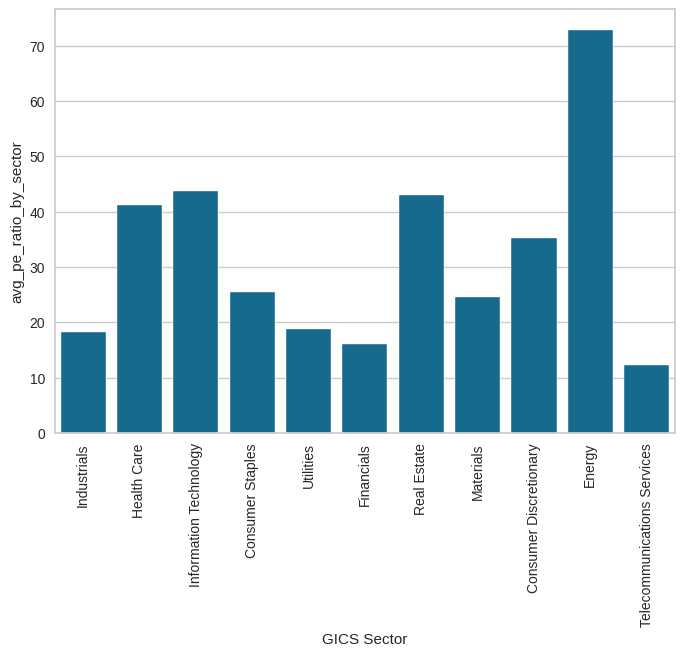

In [21]:
# creating new variable in data frame for averaging P/E ratio
avg_pe_ratio_by_sector = data.groupby('GICS Sector')['P/E Ratio'].mean()

# Use avg_pe_ratio_by_sector as a variable, not as a column name within the DataFrame.
data['avg_pe_ratio_by_sector'] = data['GICS Sector'].map(avg_pe_ratio_by_sector)

# plotting barplot
sns.barplot(x=data['GICS Sector'], y=data['avg_pe_ratio_by_sector'])
plt.xticks(rotation=90);

Observations:

1. Energy Sector has highest average P/E Ratio which means investors are willing pay high prices for this sector as they think it will make huge profit in future.

2. Followed by sector such as IT, Real Estate and Healthcare whose P/E ratio is high after Energy Sector

3. Telecommunication Services has lowest P/E Ratio which means investors are not willing to pay high prices for the stocks


Overall observation of Bivariate Analysis:

1. The sector with the highest average price increase is 'Health Care' with an average increase of 9.59.

2. Net Income is directly proportional to Earnings per Share and Estimated Share Outstanding. As Net income of the company increases, its earning per share increases which means every shareholders benefits from it as well as Estimated Share Outstanding also increases

3. As Net income increases P/E Ratio, P/B Ratio and Volatility decreases.

4. Current Price is slightly proportional to Earnings per share which means increase in current price increases earnings per share

5. Price Change is negatively proportional to volatility

6. ROE is negatively proportional to Earnings per Share

7. Information Technology Sector has highest cash ratio average which means it has higher chances to payoff short term debt with only cash and equivalents

8. IT followed by Telecommunications Services Sector which has second highest Cash Ratio Average

9. Healthcare and Financials becoming third and fourth having highest average cash ratio sector

10. Utilities Sector has lowest average cash ratio which does not have higher chances of paying off short term debt with cash or cash equivalents.

11. Energy Sector has highest average P/E Ratio which means investors are willing pay high prices for this sector as they think it will make huge profit in future.

12. Followed by sector such as IT, Real Estate and Healthcare whose P/E ratio is high after Energy Sector

13. Telecommunication Services has lowest P/E Ratio which means investors are not willing to pay high prices for the stocks

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Outlier Check:**

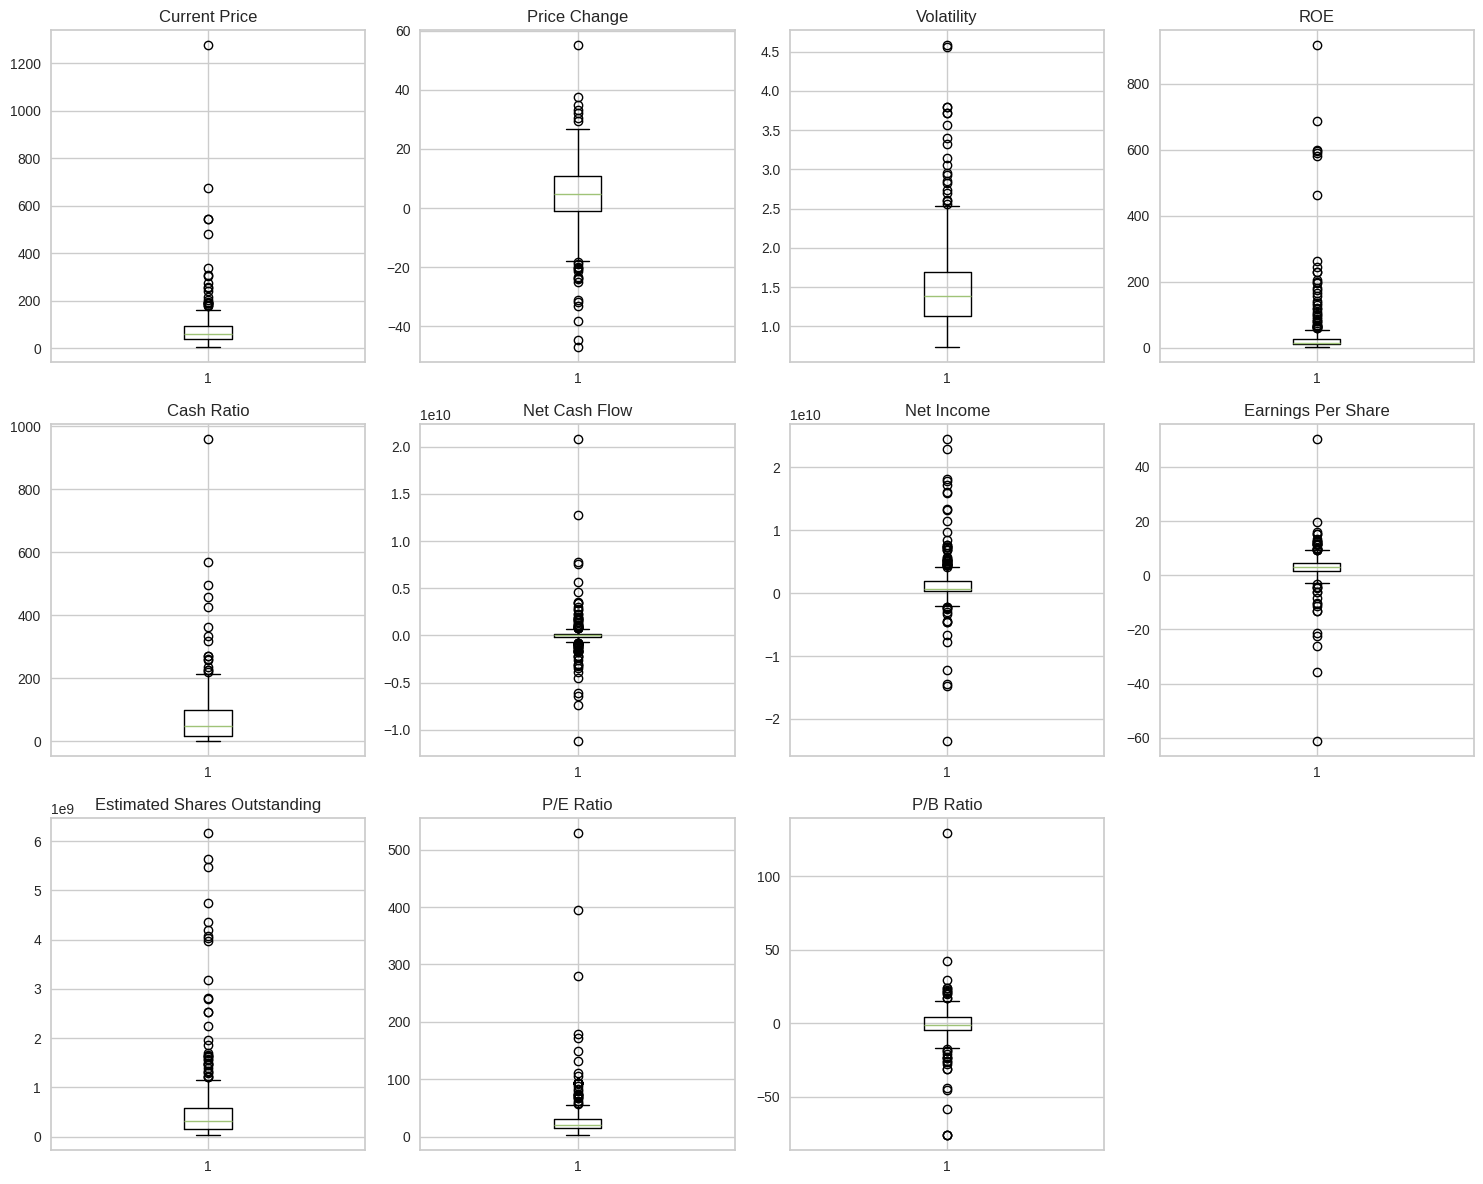

In [22]:
# checking numeric columns outliers
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

1. Current price can fluctuate so no need to fix outliers same with price change, volatility, ROE and cash ratio.

2. Net Cash Flow, Net Income and Earnings per share can be negative when company is spending too much money than making revenue, technically when company is moving towards loss.

3. Estimated shares and P/E Ratio looks good, P/B Ratio can also be negative when company has higher liability than assets.

Hence, no need to fix any outliers for this dataset

**Feature Enginnering (Scaling Dataset):**

In [23]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']]
subset_scaled = scaler.fit_transform(subset)

In [24]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [25]:
# Viewing first five rows of subset scaled df
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

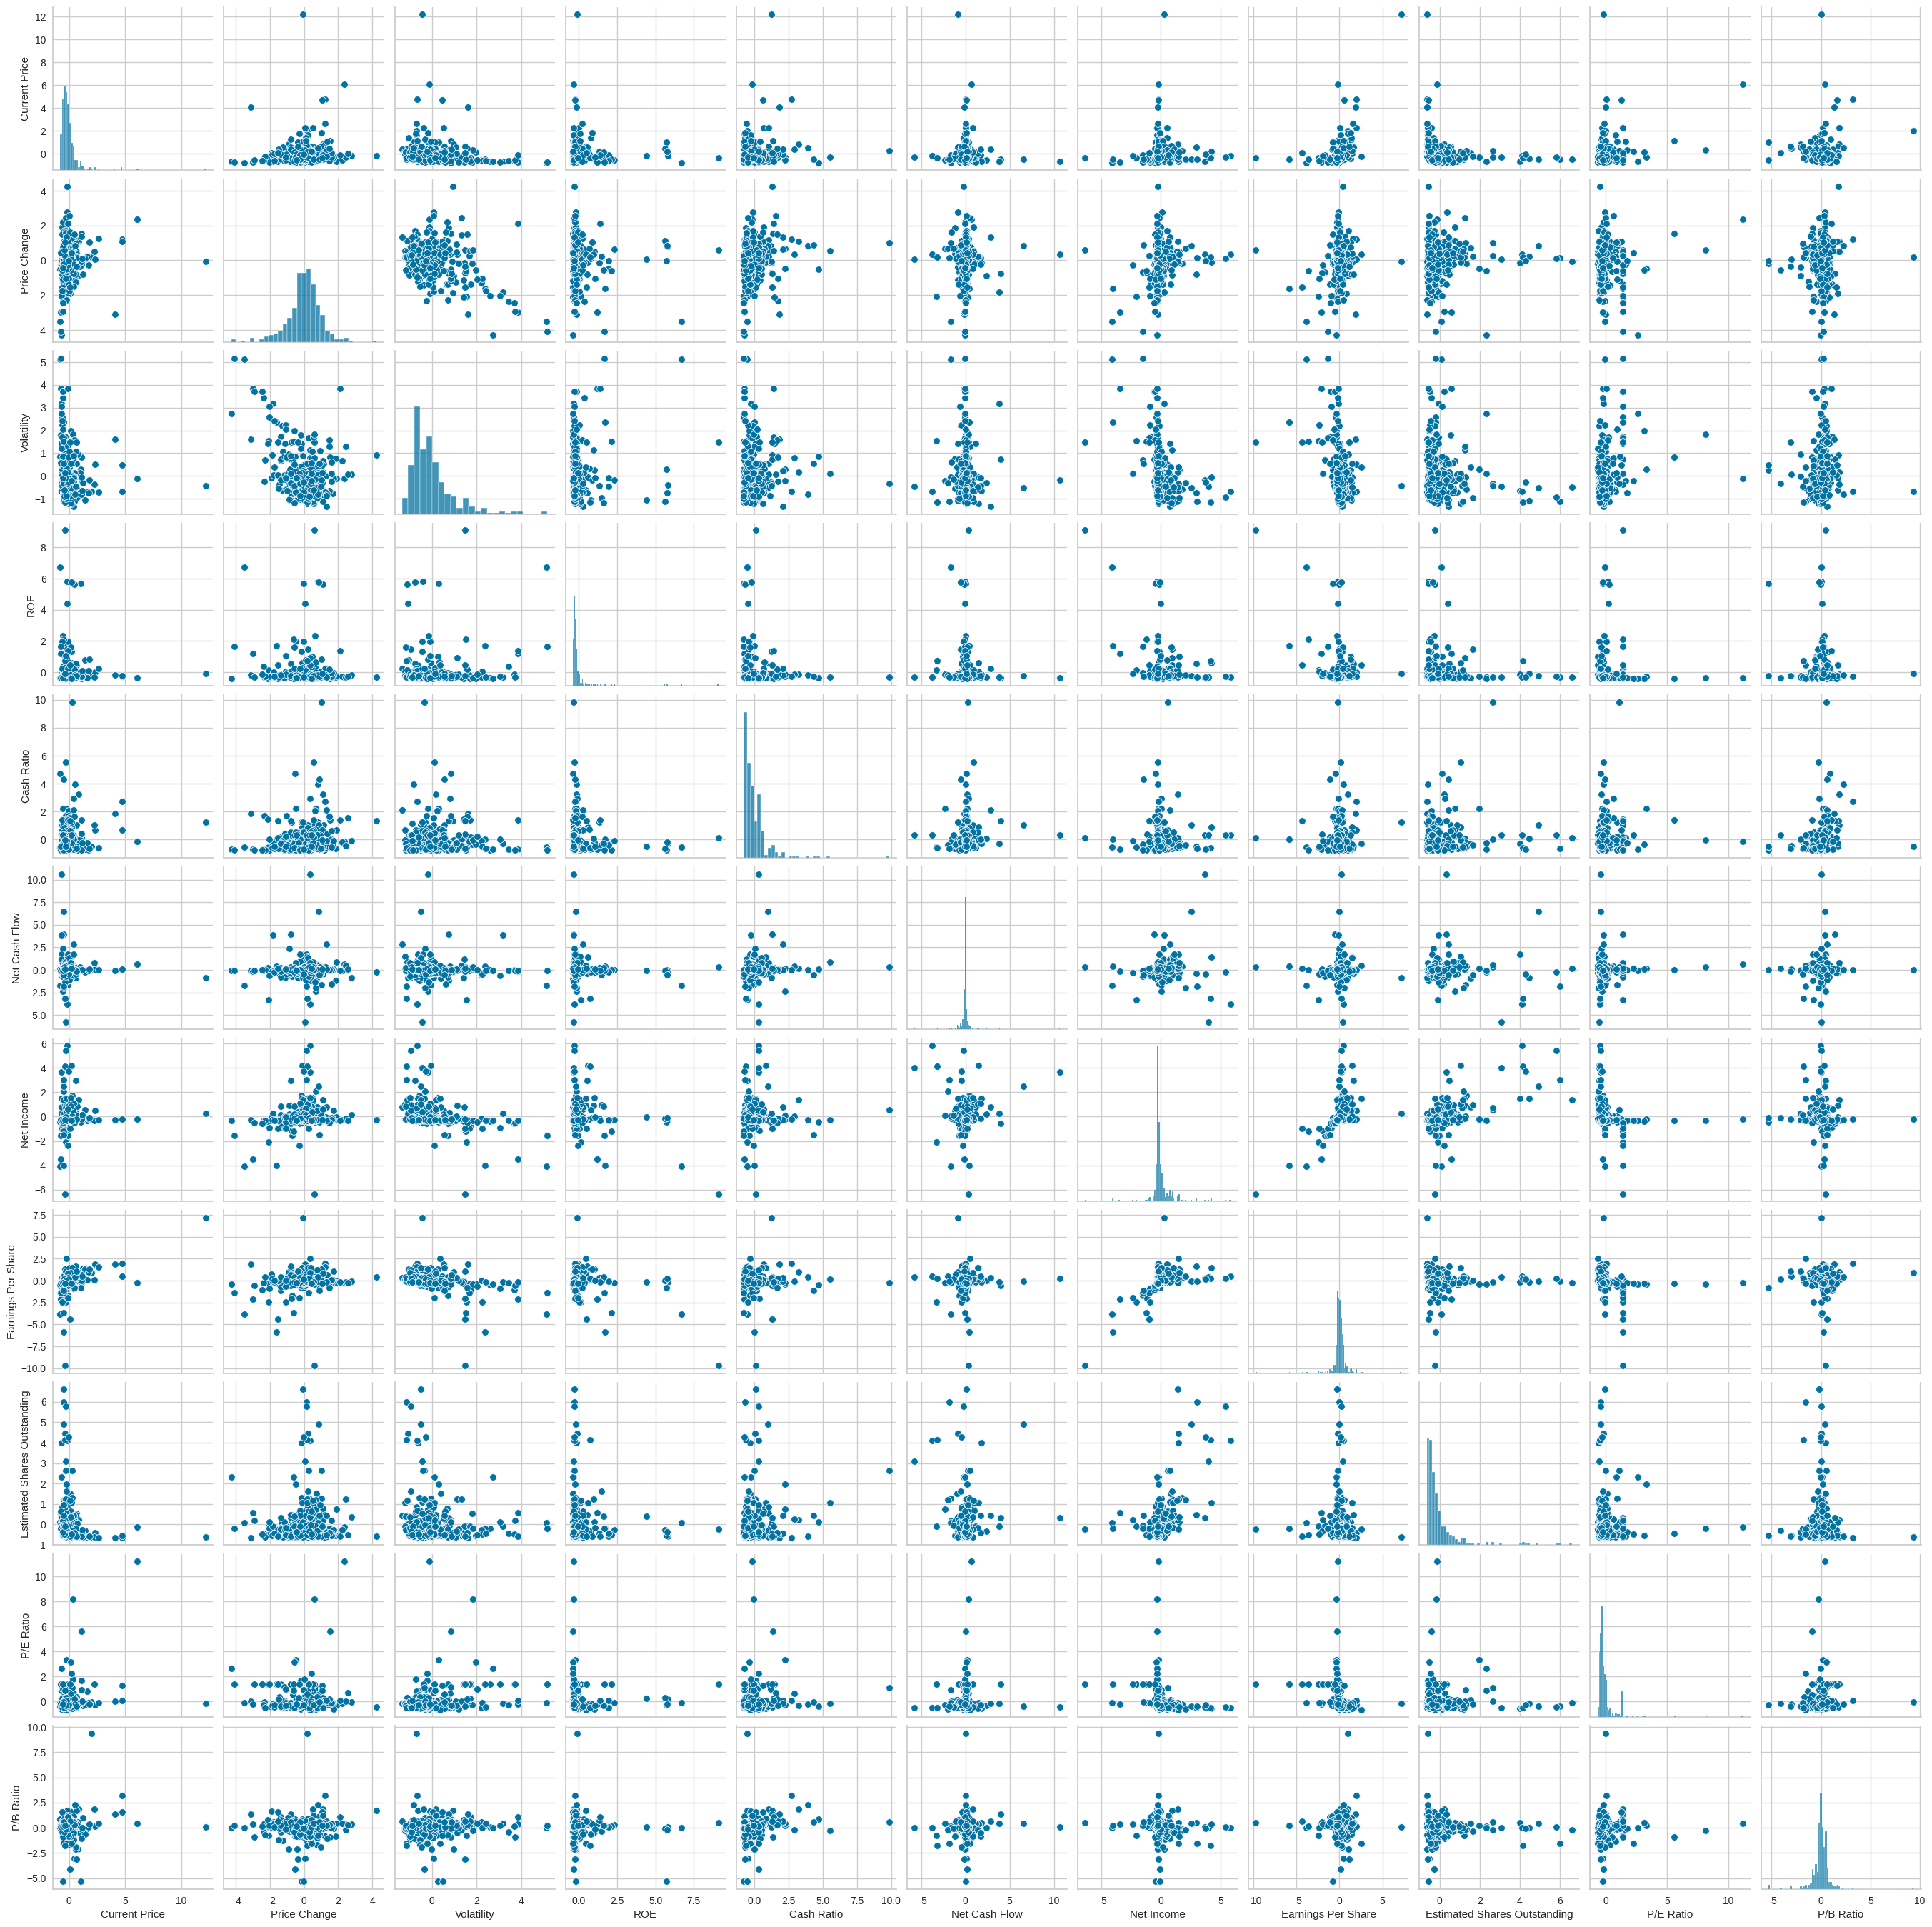

In [26]:
# performing EDA on scaled df
# crafting pairplot for scaled data
sns.pairplot(data=subset_scaled_df);

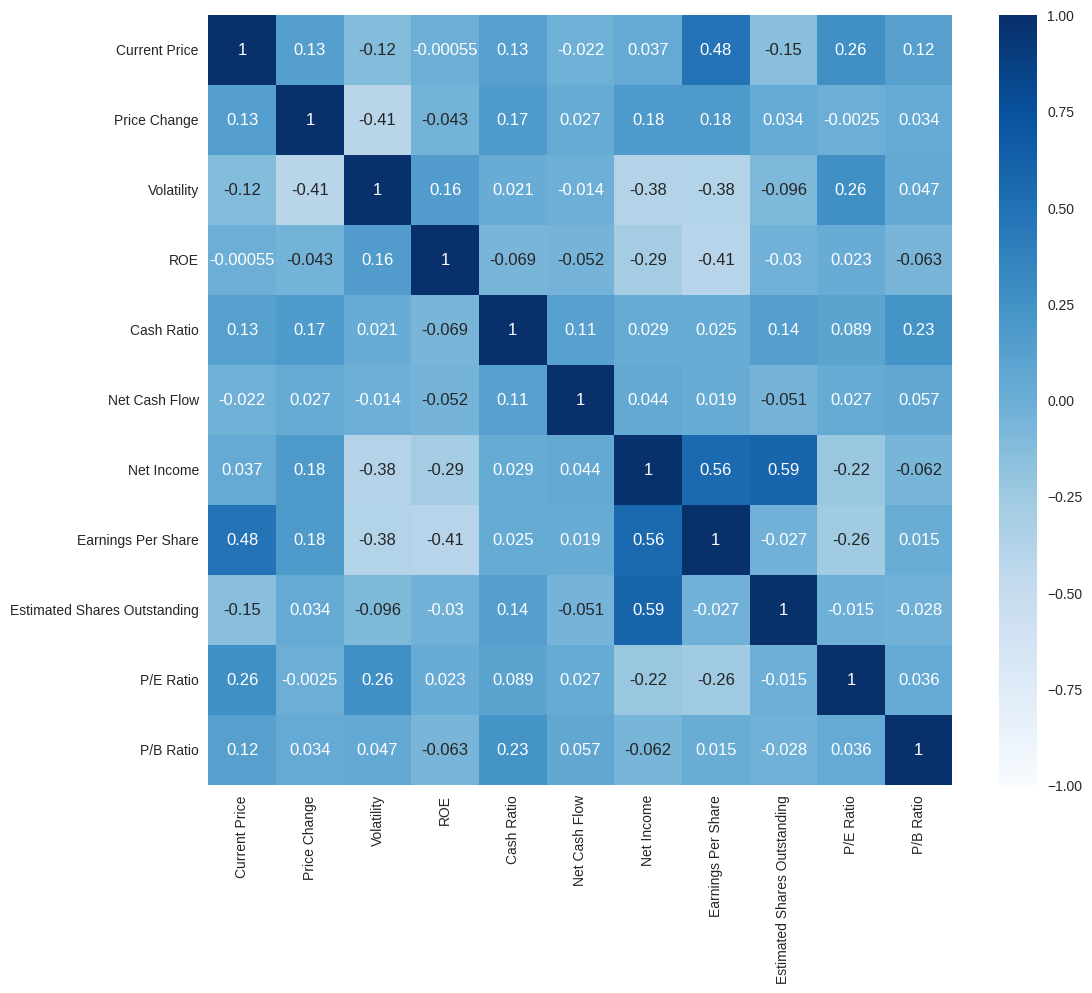

In [27]:
# Plotting heatmap for scaled df
plt.figure(figsize=(12, 10))
sns.heatmap(subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues');

Observations:

1. As the current price of the stocks increases means Earnings per share will automatically increase which indicates more profit for stockholders

2. As the Net income of the company increases, its earnings per share as well as Estimated shares outstanding will increase due to profit made by the company. Volatility will decrease as stock price will increases stability.

3. Earnings per share increases leads to decreases in ROE and volatility.

4. Increases in Volatility will negatively impact price change as prices may drop due to instability.

## K-means Clustering

In [28]:
# copying df to perform K-means clustering
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


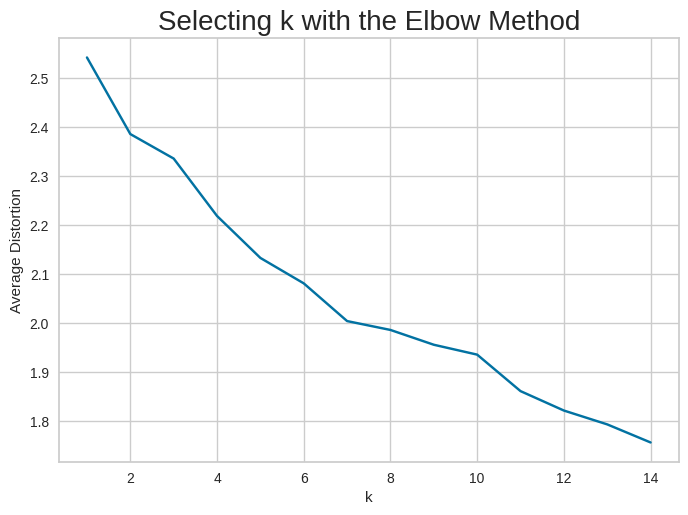

In [29]:
# creating 15 clusters for the dataset of 340 rows
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

Observations: The perfect elbow formation is forming on 6th , 7th and 8th clusters so either of them can be ideal for this dataset

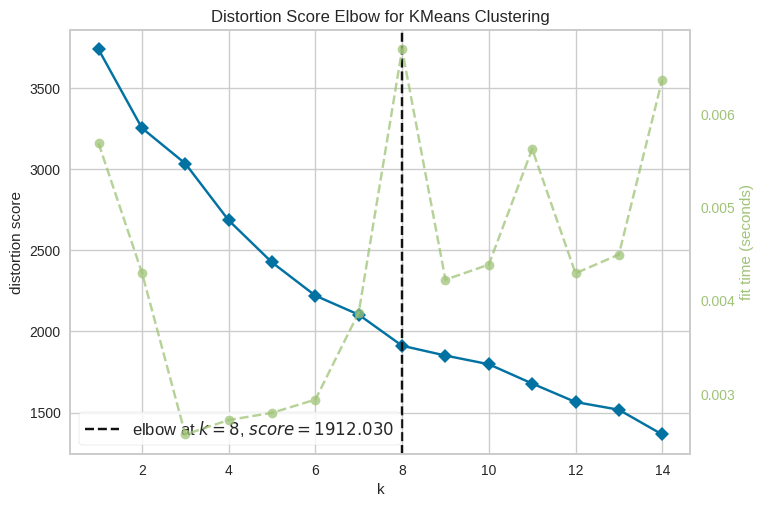

In [30]:
# visualizing the distortion score for particular cluster
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)
visualizer.show();

Observations:

1. The graph shows that if we take number of clusters as 8, it will have lower distortion score which means good clarity and distinct formation of clusters. But, as we can see in the green line graph, it has high fit time means it can take time to run hence making it more computationally expenive

2. On the other side, if we take number of clusters as 5, 6 or 7, though it has higher distortion than 8, but fit time is lesser which means it will not be computationally expensive

3. Hence, we can decide to finalize clusters ranging between 5 to 8 for now.

**Let's check silhoutte score for each selected number of clusters:**

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)
For n_clusters = 11, the silhouette score is 0.1486586842527321)
For n_clusters = 12, the silhouette score is 0.15784241071085106)
For n_clusters = 13, the silhouette score is 0.15646997458716602)
For n_clusters = 14, the silhouette score is 0.16253506827999134)


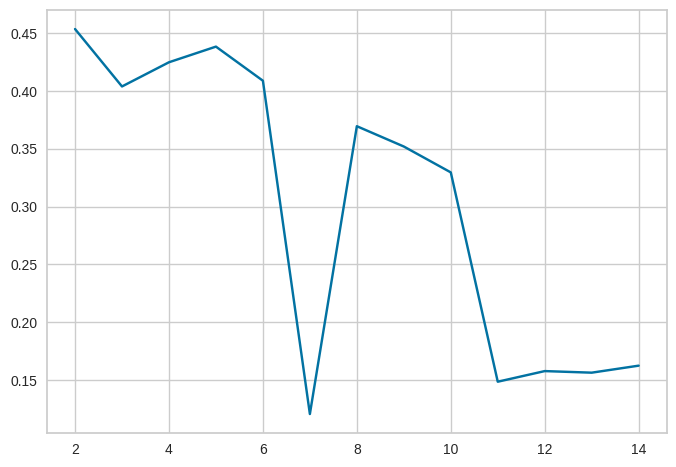

In [31]:
# Checking silhoutte score of clusters 2 to 14
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Observations:

1. From the above observations, we will decline the 7 number of clusters because it's silhoutte score is very less.

2. Hence, we will consider moving forward with 5th, 6th and 8th number of clusters as the silhoutte score of both are reasonable.

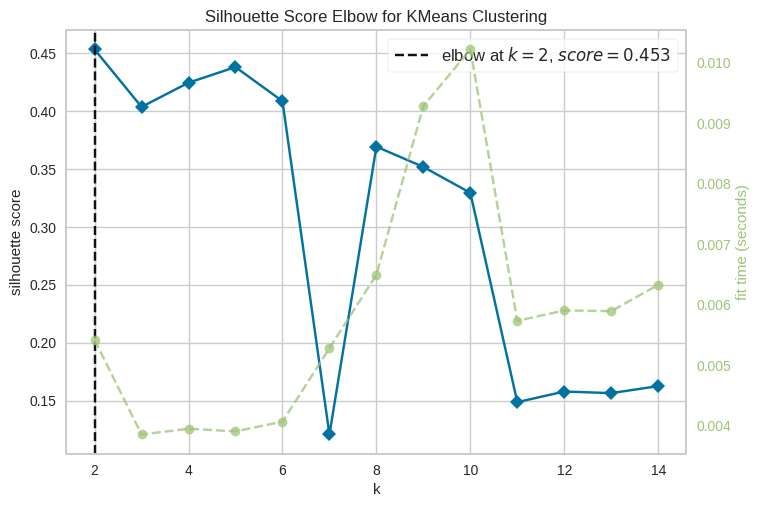

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
# checking silhoutte score with graphical visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

Observations:

1. From the previous results, we finalized 5, 6 and 8 number of clusters as an ideal choice for this dataset.

2. From the above graph, 5 has highest silhoutte score, but at the same time, fit time is also high comparatively. So chossing 5 will be time consuming and expensive at the same time

3. Same way, 8 has reasonable silhoutte score lower than 6 and also fit time is higher than 6

4. Hence, finalizing number of clusters as 6 will give good silhoutte score as well as fit time is also lower which means it will be less expensive computationally. However, 8 clusters also showed good results with lower fit time , so, for further visualization we can still check with 6 and 8


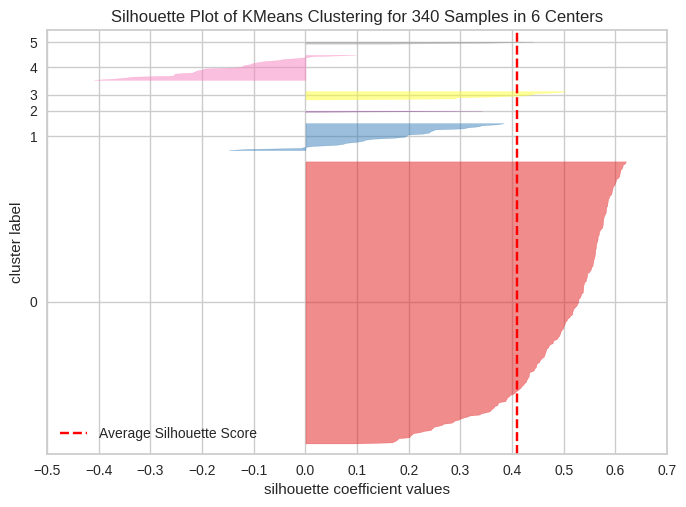

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

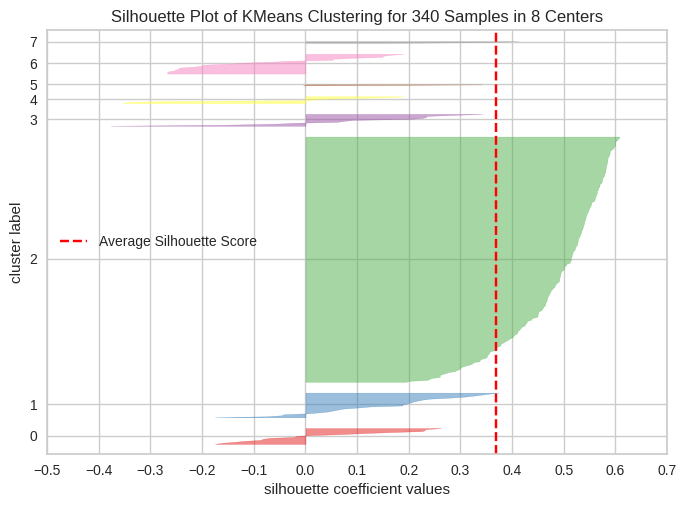

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

Observations:

It is clear that 6 number of clusters will be ideal for the dataset as it has higher silhoutte score from above graphs so we will take 6 as final number of clusters and form final model.

**Final K-Means model:**

In [35]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [36]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

**Cluster Profiling:**

In [37]:
# grouping KM_segments with each variables
km_cluster_profile = df1.groupby('KM_segments').agg({
    'Current Price': 'mean',
    'Price Change': 'mean',
    'Volatility': 'mean',
    'ROE': 'mean',
    'Cash Ratio': 'mean',
    'Net Cash Flow': 'mean',
    'Net Income': 'mean',
    'Earnings Per Share': 'mean',
    'Estimated Shares Outstanding': 'mean',
    'P/E Ratio': 'mean',
    'P/B Ratio': 'mean'
}) # Group by 'KM_segments' and calculate mean for numeric columns

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values # Group by 'KM_segments' column and get count
)

In [38]:
# highlighting the extreme values
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [39]:
## print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internationa

In [40]:
# Grouping KM_segments with GICS Sector
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    51
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Energy                         21
             Industrials                     2
             Information Technology          2
             Materials                       2
2            Energy                          2
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
4            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Information Technology          6
             Real Estate                     1
             Telecommunications Services     1
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
Name: Security, dtype: int64

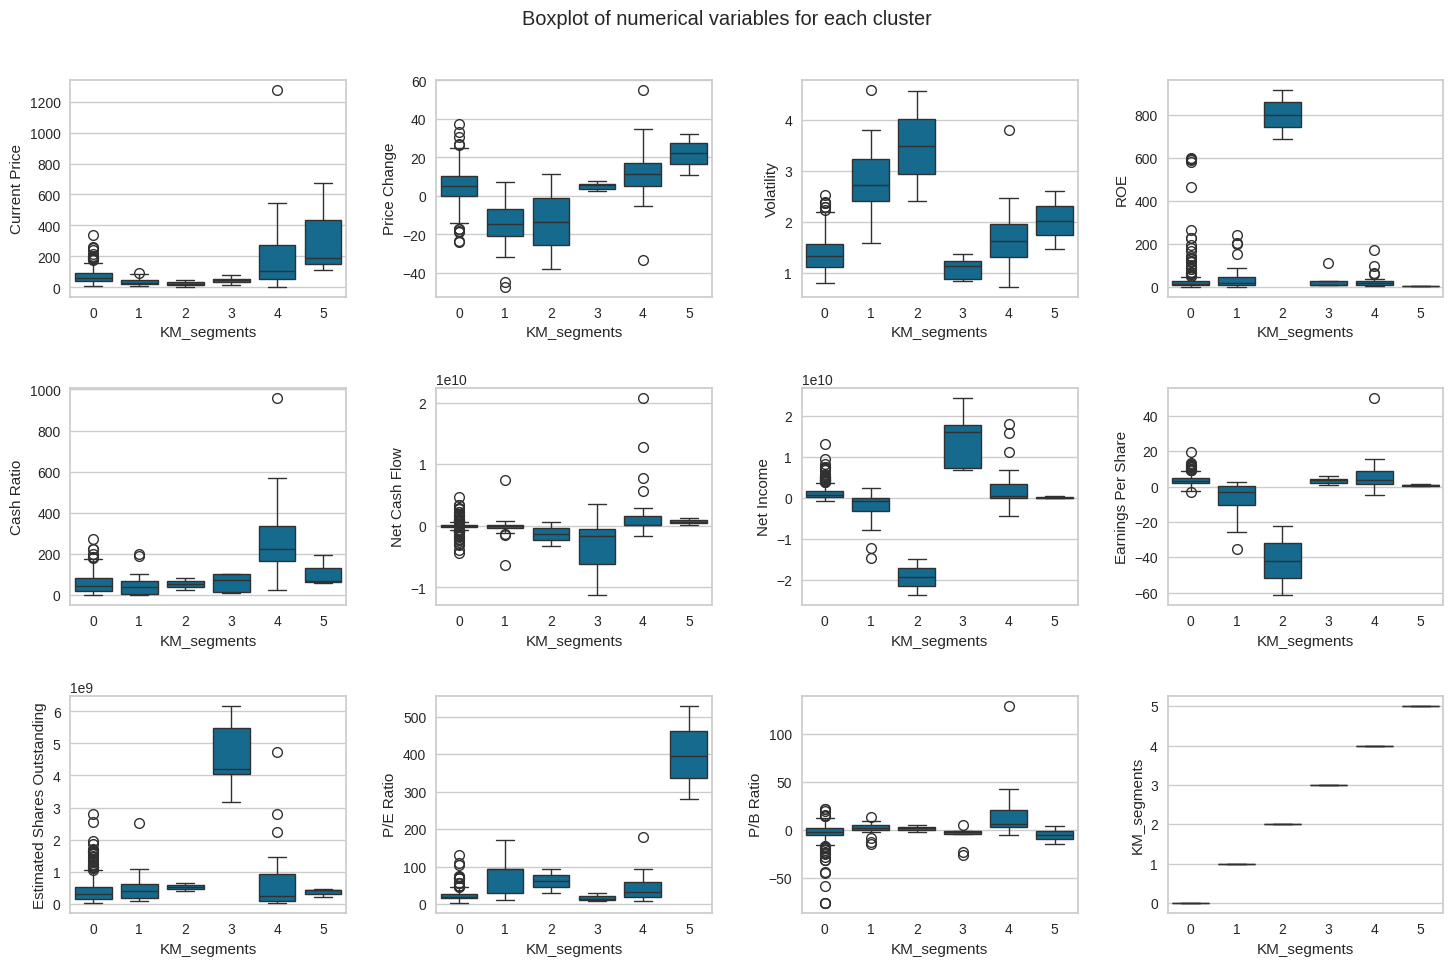

In [41]:
# plotting boxplot for numerical variables for each clusters
num_col = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    # Updated subplot layout to 3 rows and 4 columns
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

Observations:

Cluster_0: Total 274 counts falls under this cluster, has positive price change means price gone up, net cash flow is negative, P/B ratio is negative. Overall, due to negative net cash flow and P/B ratio, it suggests that companies which falls under this cluster has higher liability than assests and may be not able to payoff their short term debt with thier cash equivalents.

Cluster_1: Total 27 counts falls under this cluster, price change is negative means share prices have fallen, net cash flow is negative, net income is also negative as well as Earnings per Share is also negative. The results tells us that the companies falling under this custers makes more loss than profit so it is not reliable to invest.

Cluster_2: Total 2 companies falls under this cluster, has negative price change, highest volatility of all clusters, higher ROE of all clusters, net cash flow is negative, net income is negative as well as Earnings per Share (EPS) is also negative. Although, the company is positively using its shareholder money to generate profit by having highest ROE, it is still making loss with net income and EPS being negative.

Cluster_3: Total 3 companies falls under this cluster, it's share price is increased, but net cash flow is negative, it generates highest net income of all clusters but has negative P/B ratio. Hence, the highest net income is attractive but it also has negative cash flow and P/B ratio which suggests it has higher liabilities than assests to pay off.

Cluster_4: Total 25 companies falls under this cluster, price change is positive, cash ratio is highest, Net Cash flow is highest, Earnings per share is highest and P/B ratio is also highest of all clusters. Hence, making it most attractive to invest in companies falling under this cluster.

Cluster_5: Total 3 companies falls under this cluster, current price is highest of all, price change is highest of all, P/E ratio is highest but P/B ratio is negative. Although, it has very attractive features but P/B ratio is negative which means it might have higher liabilities to pay off, making this cluster slightly reliable to invest but with caution.

Concluding this, from all the above clusters, companies falling under cluster 4 and 5 are most reliable to invest into because of their outstanding features. Whereas, cluster 3 makes highest net income but still doubtful for good investing. Rest of all clusters are risky to invest into.

## Hierarchical Clustering

In [42]:
# copying dataset for hierarchical clustering
hc_df = subset_scaled_df.copy()

In [43]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

# Defining distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

Observations: Highest cophenetic correlation is 0.94 which is obtained with Eucledian distance and average linkage

**Let's check different linkage with eucledian distance:**

**We will also add ward linkage because it only works under eucledian distance:**

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Cophenetic correlation for ward linkage is 0.7101180299865353.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Observations: Average linkage outperformed with eucledian distance with highest cophenetic correlation of 0.94

**Plot dendograms with different linkage methode and Eucledian distance:**

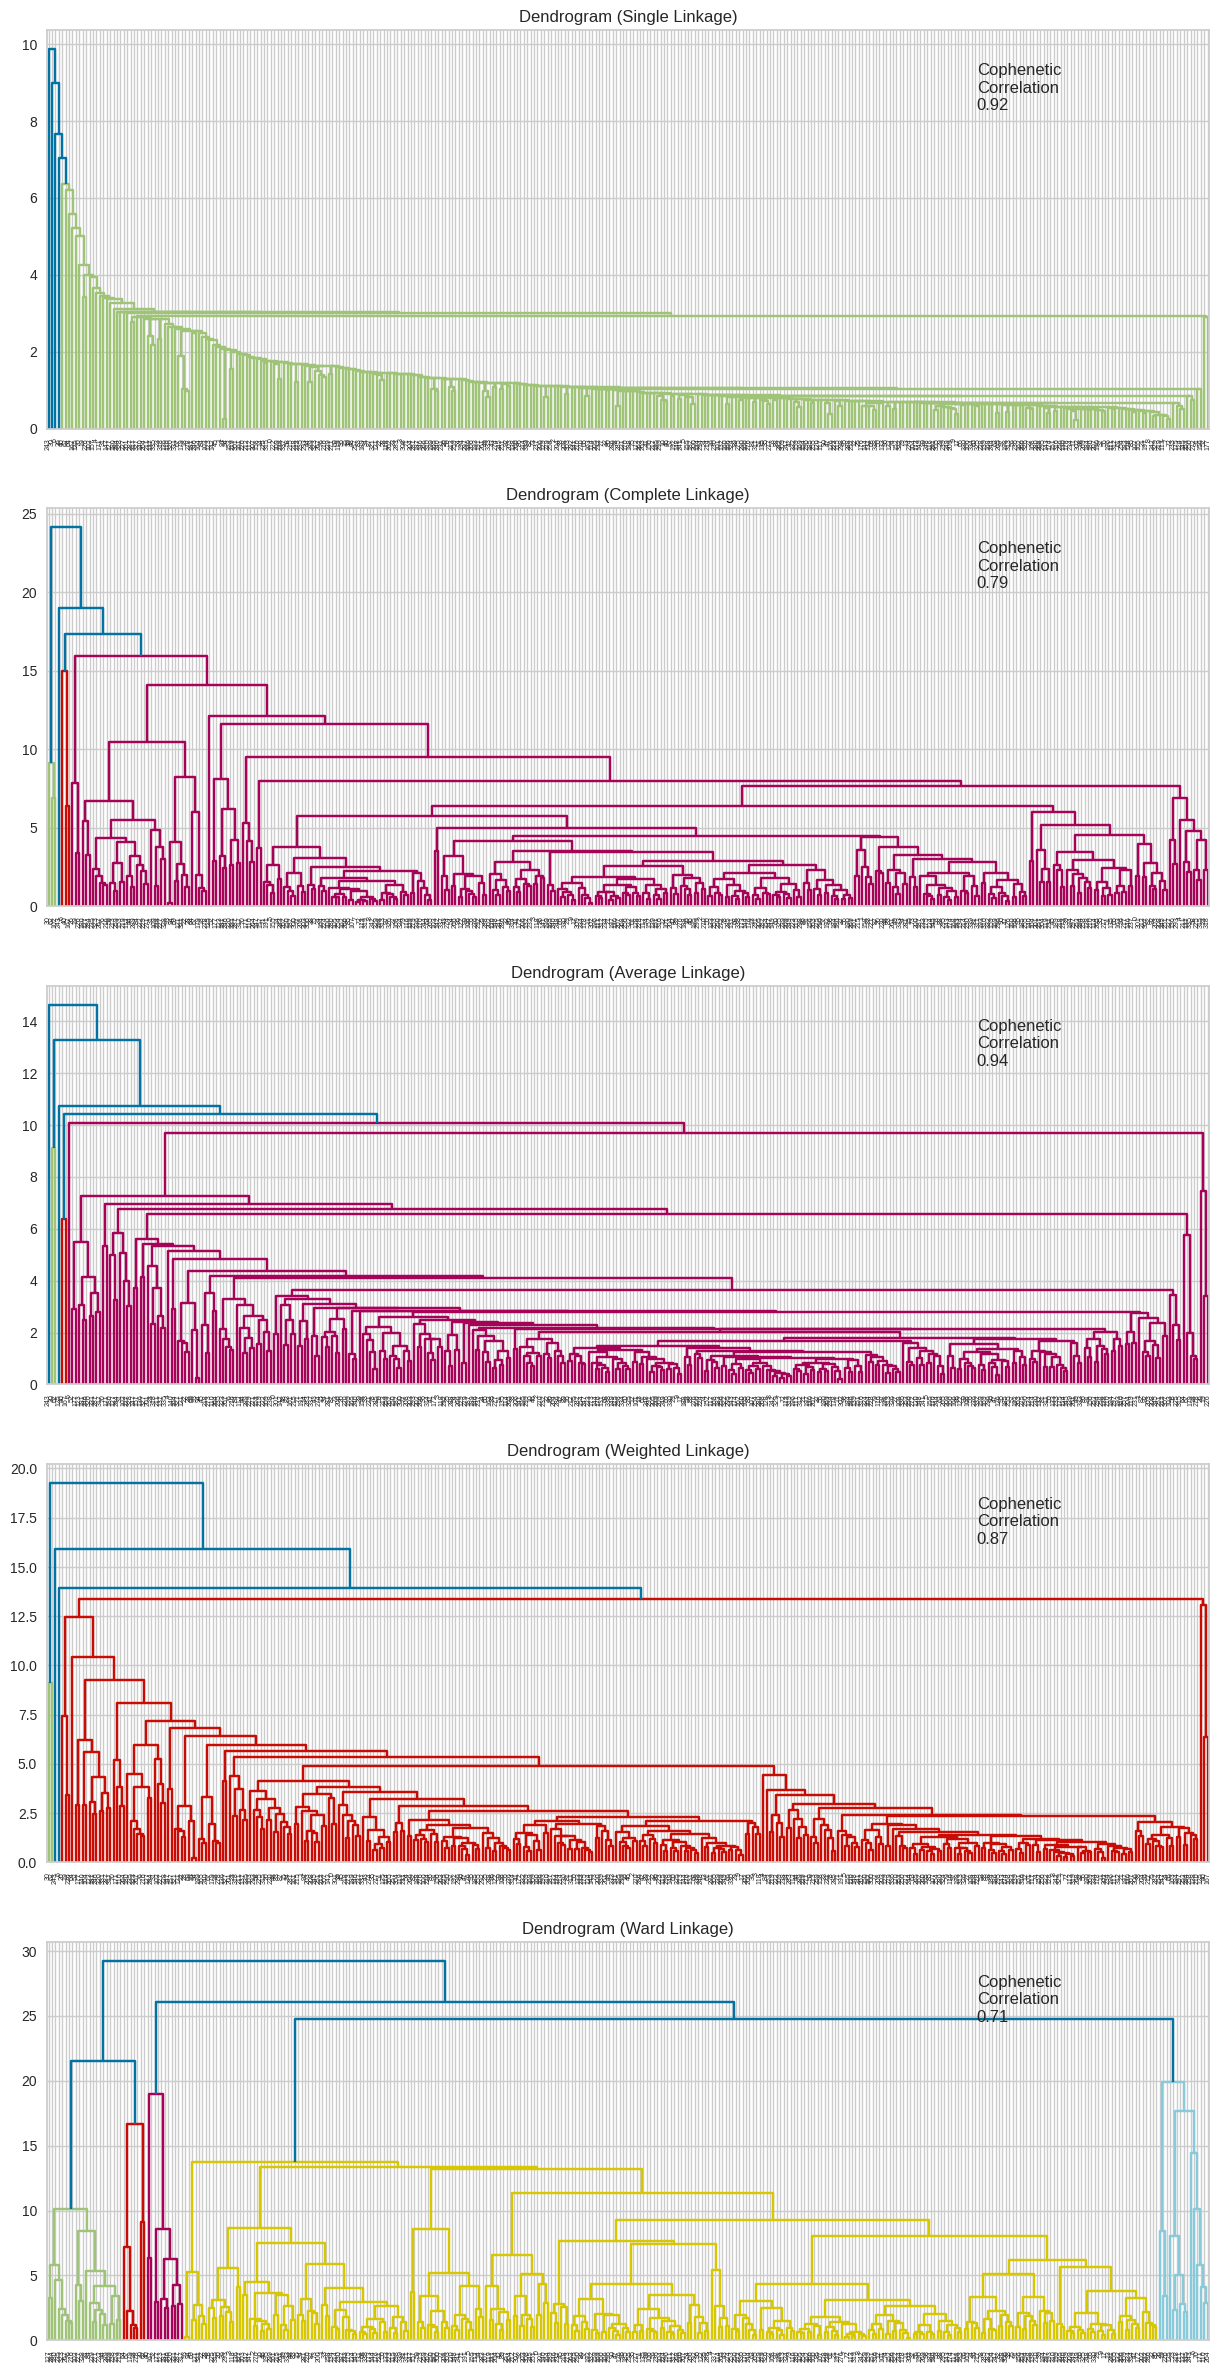

In [45]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [46]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
3  weighted                0.869378
0    single                0.923227
2   average                0.942254

Observations: From above dendograms and cophenetic coefficient, it is clear that average linkage with eucledian distance outperformed because of their highest cophenetic coefficients. Other than that, from the dendogram of average linkage, it is pretty clear that 6 number of clusters might be the ideal clusters moving forwad with hierarchical clustering.

**We will take 6 as a final number of clusters from above results for further clustering:**

In [47]:
# Agglomerative clustering with 6 as number of clusters
HCmodel = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [48]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

**Cluster Profiling:**

In [49]:
# grouping HC segments with mean of each numerical variable
hc_cluster_profile = df2.groupby('HC_segments').agg({
    'Current Price': 'mean',
    'Price Change': 'mean',
    'Volatility': 'mean',
    'ROE': 'mean',
    'Cash Ratio': 'mean',
    'Net Cash Flow': 'mean',
    'Net Income': 'mean',
    'Earnings Per Share': 'mean',
    'Estimated Shares Outstanding': 'mean',
    'P/E Ratio': 'mean',
    'P/B Ratio': 'mean'
})
hc_cluster_profile["count_in_each_segment"] = df2.groupby("HC_segments")["Security"].count().values

In [50]:
# Highlighting the extreme values
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [51]:
# Print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [52]:
# Grouping sector falling in particular clusters
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

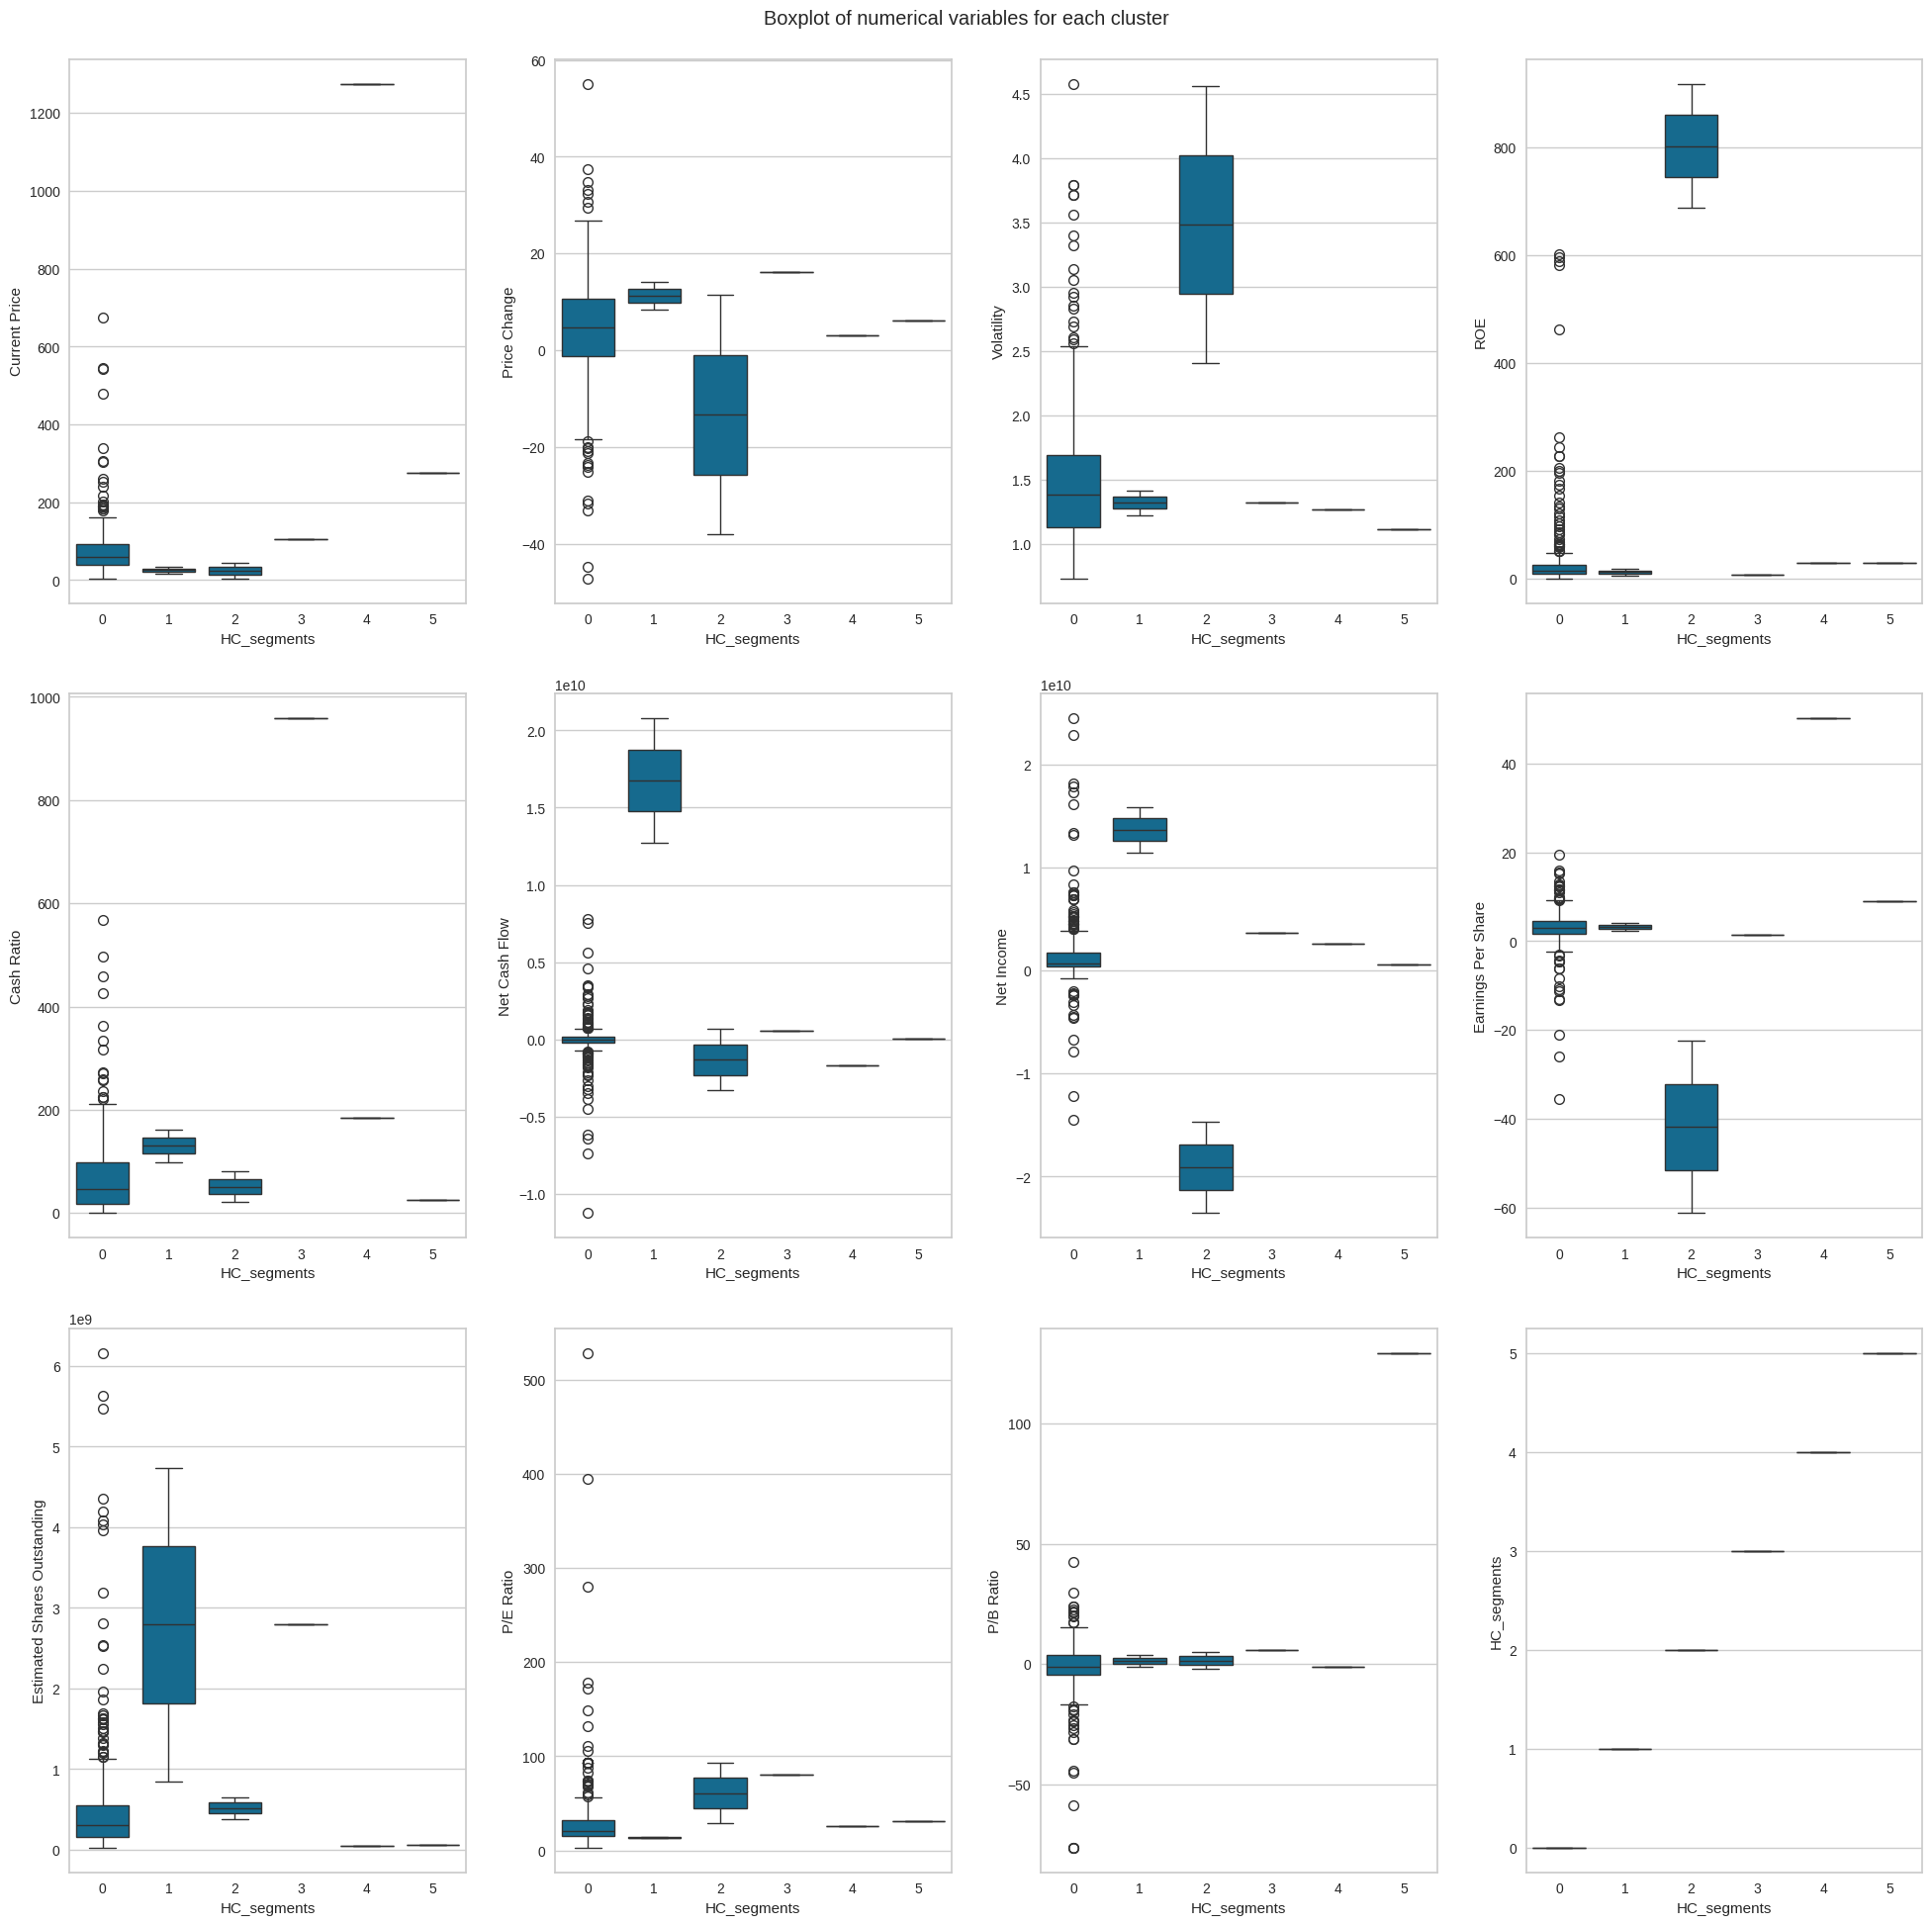

In [53]:
# plotting boxplot for each variable to see how much in which segments they are falling
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")
num_col = df2.select_dtypes(include=np.number).columns.tolist() #Selecting only numeric columns for boxplot

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Observations with average linkage:**

1. Cluster_0: Total count 333, Net cahs flow  and P/B ratio is negative. Riskier to invest in this cluster

2. Cluster_1: Total count 2, Net cash flow and Net Income is the highest of this cluster making it more profitable to invest

3. Cluster_2: Total count 2, Volatility and ROE is the highest but price change, net cash flow, net income and Earnings per share is negative. Again, making it unreliable to invest for investors

4. Cluster_3: Total count 1, Price change is highest and cash ratio is also highest as well as Estimated Shares Outstanding and P/E Ratio is also highest. More profitable to invest in this companies.

5. Cluster_4: Total count 1, Current Price and Earnings per shares are highest but Netc ash flow and P/B ratio are negative making it less reliable to invest to make profit.

6. Cluster_5: Total count 1, has P/B ratio highest and all other parameters are positive. Investors can invest in companies falling under this clusters as it has higher strength to pay off debts and acquire more assets than liabilities.

Hence, Cluster 1, 3 and 5 can make more profit if investors invest their money on them by buying their shares.

**Overall Observations:**

**1. We can see from above results that average linkage with eucledian distance gives less differentiated results. Such as we have 333 count in first cluster itself and rest of all are having either 1 or 2 sectors.**

**2. This clustering looks undifferentiated and does not vary that much. This may look like biased clustering**

**3. Hence we can try to use ward linkage with eucledian distance as it might give good differentiated clusters**





# **Let's try with ward linkage and from the dendogram, ward linkage also shows 6 as ideal clusters**

**Cluster profiling with ward linkage:**

In [54]:
# Agglomerative clustering with 6 as number of clusters
HCmodel_ward = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="ward")
HCmodel_ward.fit(hc_df)

AgglomerativeClustering(n_clusters=6)

In [55]:
# creating a copy of the original data
df3 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments_ward"] = HCmodel_ward.labels_
df3["HC_segments_ward"] = HCmodel_ward.labels_

In [56]:
# grouping HC segments with mean of each numerical variable
hc_cluster_profile_ward = df3.groupby('HC_segments_ward').agg({
    'Current Price': 'mean',
    'Price Change': 'mean',
    'Volatility': 'mean',
    'ROE': 'mean',
    'Cash Ratio': 'mean',
    'Net Cash Flow': 'mean',
    'Net Income': 'mean',
    'Earnings Per Share': 'mean',
    'Estimated Shares Outstanding': 'mean',
    'P/E Ratio': 'mean',
    'P/B Ratio': 'mean'
})
hc_cluster_profile_ward["count_in_each_segment_ward"] = df3.groupby("HC_segments_ward")["Security"].count().values

In [57]:
# Highlighting the extreme values
hc_cluster_profile_ward.style.highlight_max(color="lightgreen", axis=0)

In [58]:
# Print the companies in each cluster
for cl in df3["HC_segments_ward"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments_ward"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 

In [59]:
# Grouping sector falling in particular clusters
df3.groupby(["HC_segments_ward", "GICS Sector"])['Security'].count()

HC_segments_ward  GICS Sector                
0                 Consumer Discretionary          2
                  Health Care                     1
                  Information Technology          1
1                 Consumer Discretionary          1
                  Consumer Staples                2
                  Energy                          2
                  Financials                      1
                  Industrials                     1
2                 Consumer Discretionary          3
                  Consumer Staples                1
                  Financials                      1
                  Health Care                     7
                  Information Technology          8
                  Materials                       1
                  Real Estate                     1
                  Telecommunications Services     1
3                 Consumer Discretionary         33
                  Consumer Staples               15
                  Energy                          7
                  Financials                     44
                  Health Care                    31
                  Industrials                    52
                  Information Technology         23
                  Materials                      18
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
4                 Energy                         20
                  Information Technology          1
                  Materials                       1
5                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     1
                  Telecommunications Services     2
Name: Security, dtype: int64

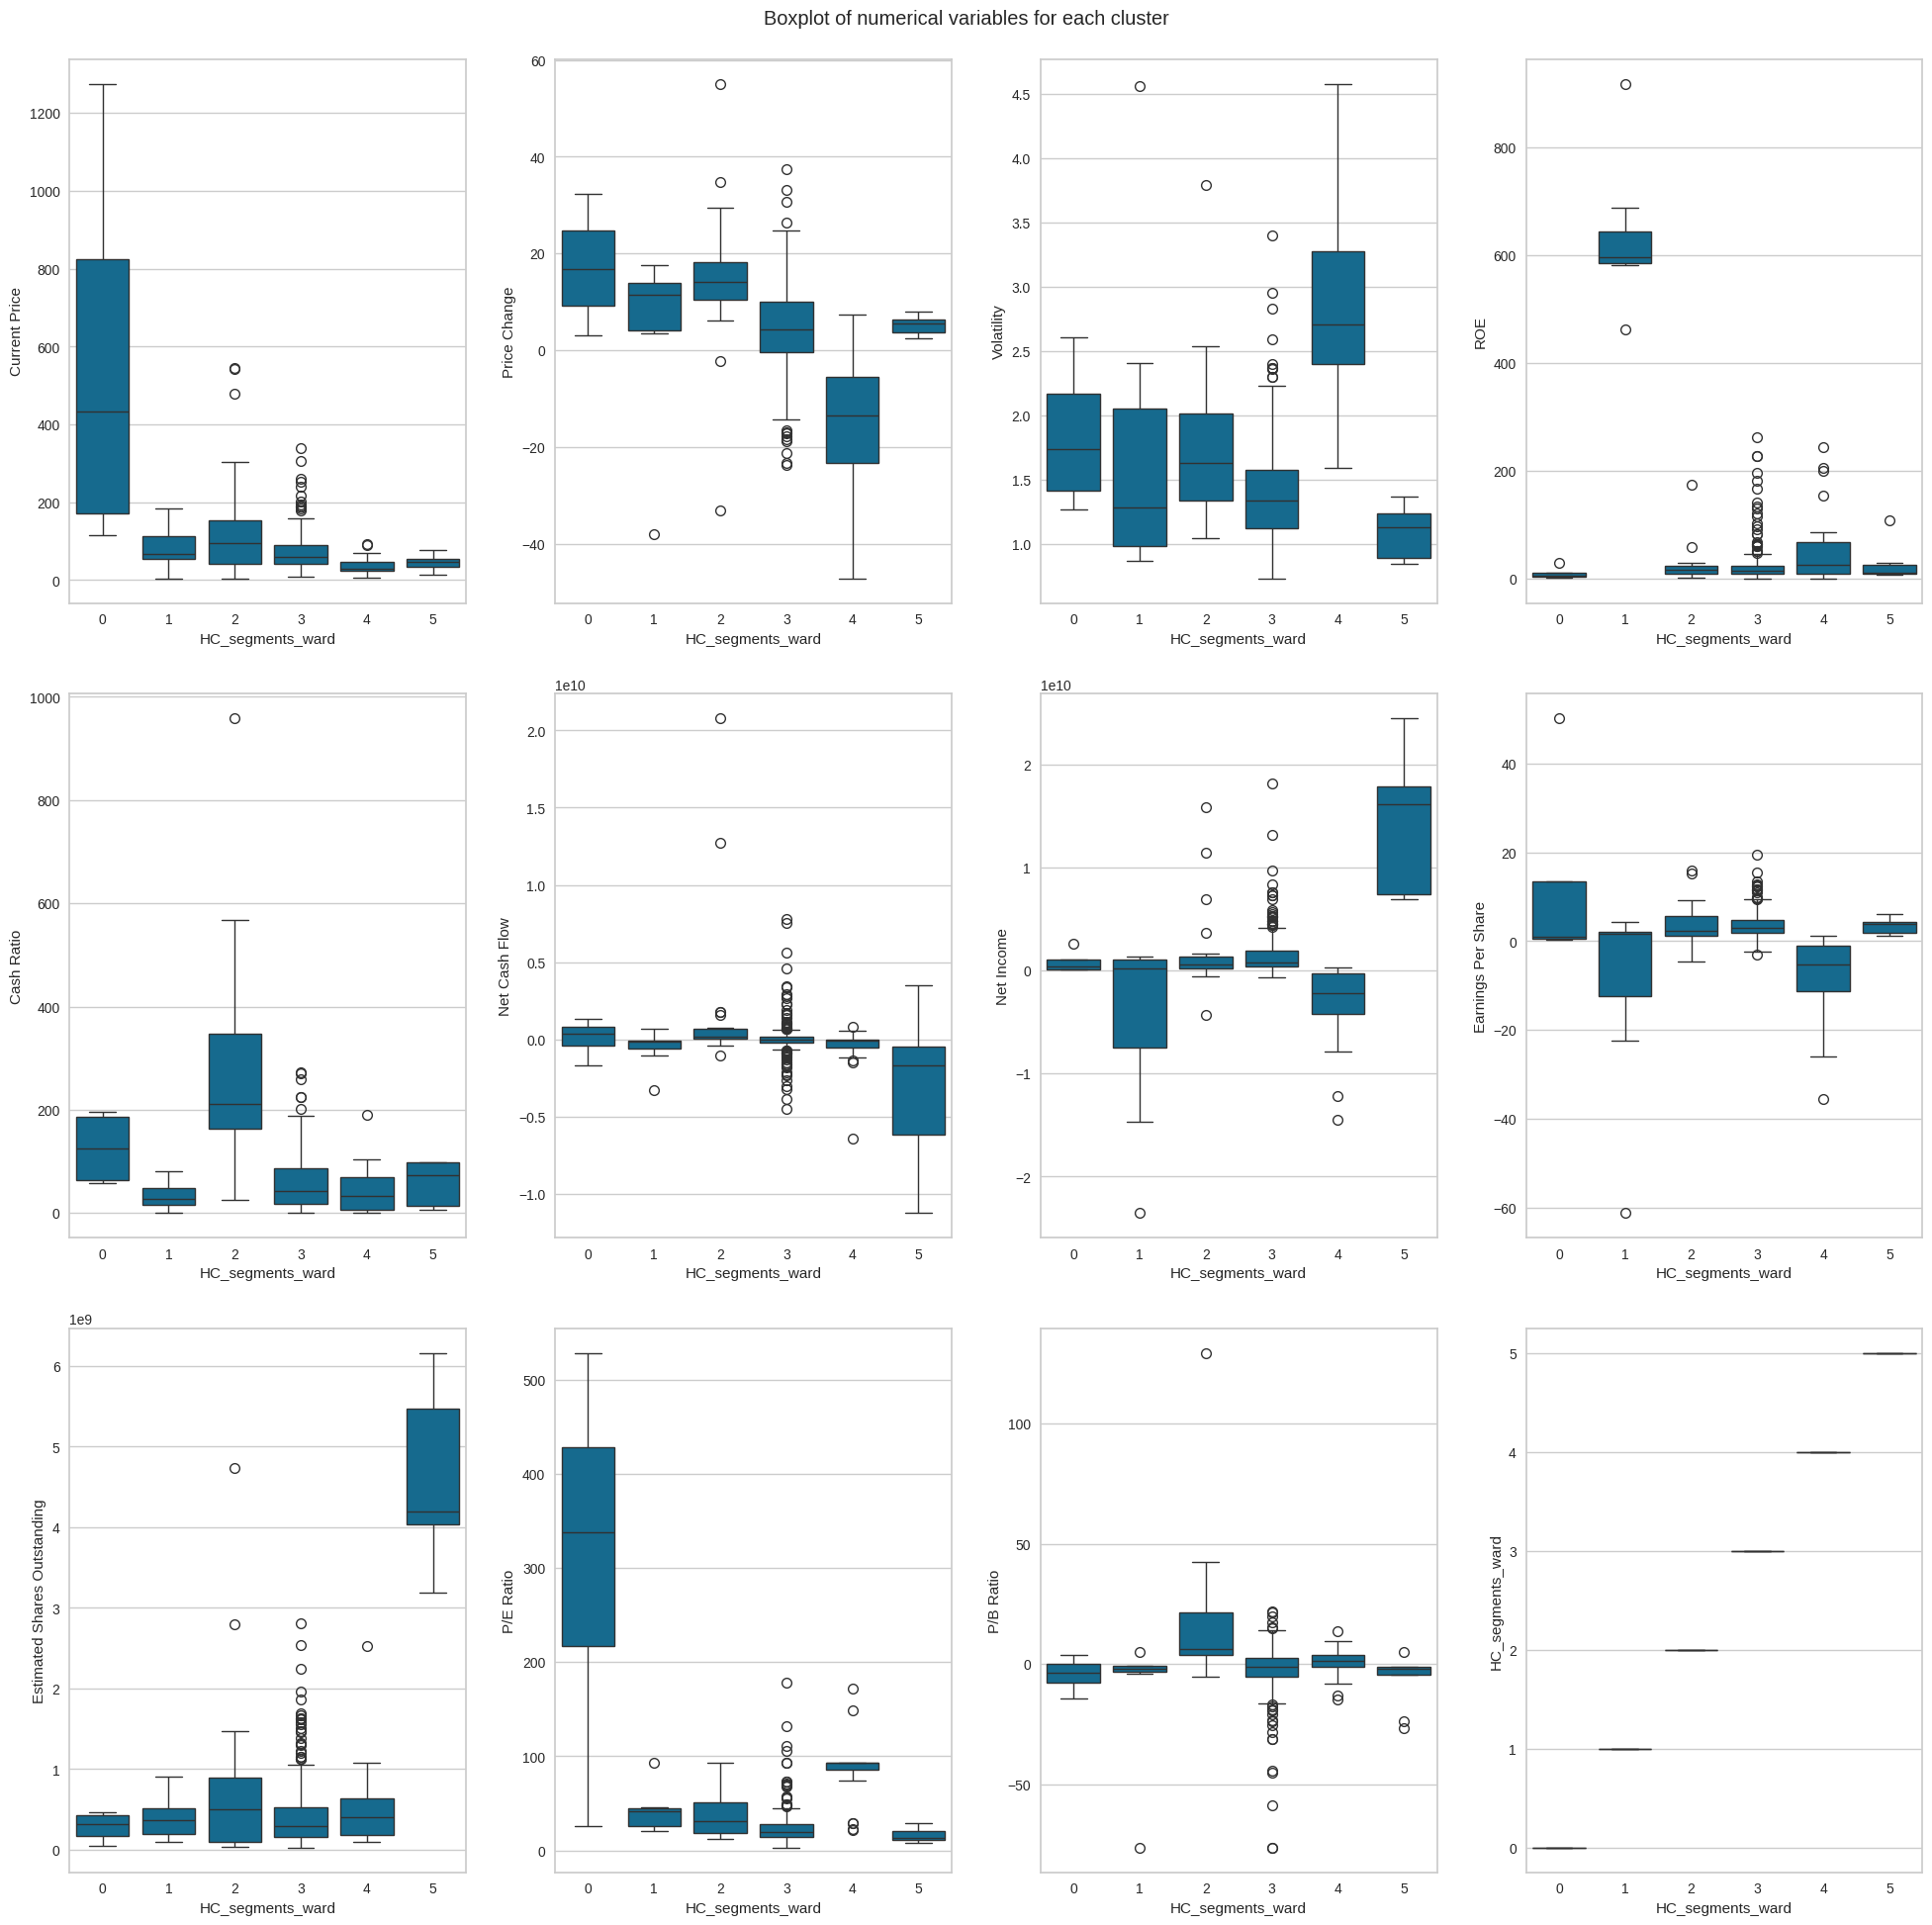

In [60]:
# plotting boxplot for each variable to see how much in which segments they are falling
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")
num_col = df3.select_dtypes(include=np.number).columns.tolist() #Selecting only numeric columns for boxplot

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df3, x="HC_segments_ward", y=variable)

plt.tight_layout(pad=2.0)

**Observations of Hierachical Clustering with ward linkage: **

1. Cluster_0: Total count 4, current price, price change, Earnings per share (EPS) and P/E Ratio is highest of all clusters but P/B ratio is negative. Overall, good to invest with risk because they might have more liabilites to pay off.

2. Cluster_1: Total count 7, ROE is highest but Net Cahs Flow, Net Income, EPS and P/B Ratio is negative making it riskier for investors.

3. Cluster_2: Total count 23, Cash ratio, Net cahs flow and P/B ratio is highest making this cluster more reliable for investors to make profit out of it.

4. Cluster_3: Total count 275, has P/B ratio negative which may be riskier because companies might have higher liablities to pay off before building their assets.

5. Cluster_4: Total count 22, Volatility is highest, Net cash flow, net income and EPS is negative making it unreliable to invest as companies are making loss

5. Cluster_5: Total count 9, Net income and Estimated Shares outstanding is highest but Net cash flow and P/B ratio is negative which means although companies are making profit, it also have more liabilities than assets to pay off.

Hence, companies falling under cluster 2 has highest chances of profit so investors can invest undoubtedly

**Difference between Average Linkage and Ward Linkage from above observation:**

**Average Linkage:**
1. More granular clusters — good at picking out companies that are extremely good or extremely bad.

2. Better if you're analyzing niche opportunities or specific companies worth exploring further.

3. Investment-wise: Great for highlighting extremes (both positive and negative).

**Ward Linkage:**
1. More stable and balanced clusters, each with stronger internal similarity.

2. Better suited for identifying groups of companies with consistent performance, making investment decisions more scalable.

3. Investment-wise: Great for finding reliable clusters with low internal variation.

**Hence, Ward Linkage gave better results by forming more stable and balanced clusters**

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

# **Overall differences between K-means and Hierarchical clustering techniques (Average + Ward Linkage) from above observations: **

1. KMeans clustering technique took less time for execution than Hierarchical clustering because KMeans is usually good with execution of larger dataset.

2. KMeans clustering technique gave more distinct clusters as we can see from the observation, Cluster 4 is most profitable and attractive where as cluster 1 and 2 is more riskier as well as Cluster 5 is attractive but riskier at the same time. On the other side, Hierarchical clustering seems to make patterns harder to conclude due to imbalanced clustering.

3. KMeans clustering has most profitable cluster 4 in which total count is 25 where as in ward linkage cluster 2 is very profitable with count 23 which is close. In KMeans, cluster 0 with 274 count gave average rankings similarly in ward linkage, cluster 3 with 275 gave average rankings. In KMeans, the risky cluster was 1 with 27 counts where as in ward linkage risky cluster was 1 with 7 counts which is not very close though.
Technically, total number of 310 counts obtained to be assigned to similar clusters between KMeans and Hierarchical clustering

4. KMeans and Hierarchical clustering both obtained 6 as an ideal number of clusters for this dataset

Hence, KMeans clustering gave clear differences among the sectors through clustering. It gave strong results by dividing sectors into clusters which shows clear differences among most profit making, average profit making as well as loss making companies.

Whereas, Hierarchical clustering techniques were imbalanced especially average linkage. Average Linkage did not give clear differences hence it gave more complex results by forming improper clusters. On the other side, Ward linkage method is known for balanced data clustering, so it gave more balanced clusters than averag linkage.

**Conclusion:** KMeans Clustering should be used for getting more balanced and clear clusters as well as we also can use ward linkage method for better clustering using hierarchical technique.

## Actionable Insights and Recommendations

1. Cluster 4 (healthcare, IT, Fincance etc) in KMeans and Cluster 2 (consists of Health care, IT, Finance sector etc) in Ward Linkage are high performing cluster group. The companies falling under these clusters are high profit making and can turn out highly profitable for investors.

2. KMeans Cluster 1 and Ward Linkage cluster 1 and 4 shows financial distress. This includes Energy sector, few finance and IT sector as well. Investors must avoid or invest with caution into the companies falling under this clusters.

3. KMeans Cluster 2 includes Energy sectors is good for long term investments due to high ROE but negative net income. The companies could be on early growth phase at the moment.

4. Companies under cluster 5 in KMeans tends to be overvalued due to high P/E ratio but less P/B ratio. Investors should consider this only for short term gains and monitor regularly the trends of the company.

5. Investors should focus on Cash Ratio and Net cash flow of the companies, if those metrics are high, then investors can invest because companies are more prone to payoff short term debts with their liquid assets even though they are making reasonable profits. Such as Cluster 4 in KMeans clustering is investable.

